<div style="background:#e9f2ff; padding:14px; border-radius:10px;">
  <div style="color:#1b3c78; font-size:32px; font-weight:bold;">
    Projet 4 : Classifiez automatiquement des informations
  </div>
 

### 1. Analyse et exploration

#### 1.1 Préliminaire

In [2]:
# Importation des librairies

import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import seaborn as sns

In [3]:
# Importation de nos fichiers de données csv

df_sirh = pd.read_csv("extrait_sirh.csv")
df_eval = pd.read_csv("extrait_eval.csv")
df_sondage =pd.read_csv("extrait_sondage.csv")

# Affichage des 5 premières lignes de chaque dataframe
display(df_sirh.head())
display(df_eval.head())
display(df_sondage.head())

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


**3 sources de données:**

- `extrait_sirh.csv`(Le profil RH) : Contient les informations factuelles et démographiques.
- `extrait_eval.csv` (La performance): Contient les notes d'évaluation, la satisfaction et des indicateurs de charge de travail.
- `extrait_sondage.csv` (Le ressenti) : Contient des infos sur la vie privée (enfants, trajet), le niveau d'études, et surtout la variable la plus importante : **est-ce qu'ils sont partis ou non.**

**Dictionnaire des variables **

Fichier SIRH (`extrait_sirh.csv`)

- `id_employee` : Identifiant unique (Clé de jointure).
- `age`, `genre`, `statut_marital` : Données démographiques.
- `revenu_mensuel` : Salaire mensuel
- `departement`, `poste` : L'équipe et le métier exercé.
- `annee_experience_totale` : Expérience totale dans la vie pro.
- `annees_dans_l_entreprise` : Ancienneté chez TechNova.
- `annees_dans_le_poste_actuel` : Ancienneté sur le poste actuel.
- `nombre_heures_travailless` : Base horaire contractuelle.

Fichier Évaluations (`extrait_eval.csv`)

- `eval_number` : Identifiant de l'évaluation (Clé de jointure)
- `note_evaluation_actuelle` / `_precedente` : Note de performance (1 à 4 souvent)
- `satisfaction_employee_...` : Notes de 1 à 4 sur l'environnement, l'équipe, l'équilibre vie pro/perso
- `heure_supplementaires` : Oui/Non 
- `augementation_salaire_precedente` : Pourcentage d'augmentation

Fichier Sondage (`extrait_sondage.csv`)

- `code_sondage` : Identifiant du sondage (Clé de jointure)
- `a_quitte_l_entreprise` : variable cible
- `distance_domicile_travail` : En km 
- `nb_formations_suivies` : Indicateur d'investissement sur le salarié
- `frequence_deplacement` : Déplacements professionnels



In [4]:
display(df_sirh.info())
display(df_eval.info())
display(df_sondage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

None

L'analyse initiale montre que les trois fichiers (SIRH, Évaluations, Sondage) sont de très bonne qualité :

- Ils contiennent tous exactement 1470 lignes (un employé par ligne).

- Ils ne comportent aucune valeur manquante.

Cependant, deux ajustements sont nécessaires pour permettre la jointure et l'analyse :

- `eval_number` : Actuellement au format texte, le préfixe "E_" sera retiré pour convertir la variable en entier (int).

- `augmentation_salaire_precedente` : Le symbole "%" sera retiré pour convertir la variable en entier (int).

#### 1.2 Jointure

In [5]:
# Ajustements nécessaires pour permettre la jointure et l'analyse

# Nettoyage de l'ID dans df_eval
df_eval['id_clean'] = df_eval['eval_number'].astype(str).str.replace('E_', '', regex=False).astype(int)

# Nettoyage du salaire dans df_eval
df_eval['augementation_salaire_precedente'] = df_eval['augementation_salaire_precedente'].astype(str).str.replace(' %', '', regex=False).astype(int)

# Vérification
print("id_clean :", df_eval['id_clean'].dtype)
print("Type salaire :", df_eval['augementation_salaire_precedente'].dtype)
display(df_eval.head())
display(df_eval.info())
display(df_sirh.head())

id_clean : int64
Type salaire : int64


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,id_clean
0,2,3,2,4,1,1,E_1,3,Oui,11,1
1,3,2,2,2,4,3,E_2,4,Non,23,2
2,4,2,1,3,2,3,E_4,3,Oui,15,4
3,4,3,1,3,3,3,E_5,3,Oui,11,5
4,1,3,1,2,4,3,E_7,3,Non,12,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   int64 
 10  id_clean                            

None

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


In [6]:
# Jointure des trois dataframes
df_temp=pd.merge(
    df_sirh,
    df_eval,
    left_on='id_employee',
    right_on='id_clean',
    how='inner'
)

df_final=pd.merge(
    df_temp,
    df_sondage,
    left_on='id_employee',
    right_on='code_sondage',
    how='inner'
)

# 4. Nettoyage final
colonnes_a_supprimer = ['id_clean', 'eval_number', 'code_sondage']
df_final = df_final.drop(columns=colonnes_a_supprimer)

# Vérification de la jointure
display(df_final.info())
display(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   id_employee                                1470 non-null   int64 
 1   age                                        1470 non-null   int64 
 2   genre                                      1470 non-null   object
 3   revenu_mensuel                             1470 non-null   int64 
 4   statut_marital                             1470 non-null   object
 5   departement                                1470 non-null   object
 6   poste                                      1470 non-null   object
 7   nombre_experiences_precedentes             1470 non-null   int64 
 8   nombre_heures_travailless                  1470 non-null   int64 
 9   annee_experience_totale                    1470 non-null   int64 
 10  annees_dans_l_entreprise            

None

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,0,0,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,...,1,3,1,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,0,3,1,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,...,0,3,1,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,...,1,3,1,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [7]:
df_final['nombre_heures_travailless'].head()

0    80
1    80
2    80
3    80
4    80
Name: nombre_heures_travailless, dtype: int64

#### 1.3 Analyse déscriptive 

In [8]:
df_final.describe()

,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,...,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,augementation_salaire_precedente,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,6502.931293,2.693197,80.0,11.279592,7.008163,4.229252,2.721769,2.729932,...,2.761224,3.153741,15.209524,0.793878,2.799320,1.0,9.192517,2.912925,2.187755,4.123129
std,602.024335,9.135373,4707.956783,2.498009,0.0,7.780782,6.126525,3.623137,1.093082,0.711561,...,0.706476,0.360824,3.659938,0.852077,1.289271,0.0,8.106864,1.024165,3.222430,3.568136
min,1.000000,18.000000,1009.000000,0.000000,80.0,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,3.000000,11.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000
25%,491.250000,30.000000,2911.000000,1.000000,80.0,6.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,12.000000,0.000000,2.000000,1.0,2.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,4919.000000,2.000000,80.0,10.000000,5.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,14.000000,1.000000,3.000000,1.0,7.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,8379.000000,4.000000,80.0,15.000000,9.000000,7.000000,4.000000,3.000000,...,3.000000,3.000000,18.000000,1.000000,3.000000,1.0,14.000000,4.000000,3.000000,7.000000
max,2068.000000,60.000000,19999.000000,9.000000,80.0,40.000000,40.000000,18.000000,4.000000,4.000000,...,4.000000,4.000000,25.000000,3.000000,6.000000,1.0,29.000000,5.000000,15.000000,17.000000


Notre `.describe()` nous donne des informations utiles pour la suite :

Variables inutiles :

`nombre_heures_travailless` : Le minimum et le maximum sont à 80. Tous les employés semblent faire le même nombre d'heures. Cette variable ne sera pas utile pour notre modèle.

`nombre_employee_sous_responsabilite` : Aucune variation également (variable sans doute bloquée à 1 par erreur). Sans intérêt pour notre modèle.

Disparités salariales :

`revenu_mensuel` : On observe une grande disparité. Le minimum est à 1009$ et le maximum à 19 999$. La médiane (4919$) est inférieure à la moyenne (6503$), ce qui indique que de très gros salaires tirent la moyenne vers le haut.

Fidélité et Expérience :

Les variables `annees_dans_le_poste_actuel`, `annee_experience_totale` et `annees_dans_l_entreprise` nous montrent que les employés sont plutôt fidèles.

Fidélité confirmée : Le ratio moyen Ancienneté / Expérience totale est de 68%. C'est élevé ! Cela signifie qu'en moyenne, les employés ont passé plus des deux tiers de toute leur carrière chez TechNova.

Mobilité interne et Formation :

Mobilité dynamique : 84% des employés ont une ancienneté supérieure à leur temps dans le poste actuel. Cela démontre la volonté de l'entreprise de faire évoluer ses employés.

Formations : Une moyenne de 2.8 formations, ce qui est un chiffre correct pour l'accompagnement et l'évolution des équipes.

In [9]:
# Extraction des individus ayant quitté l'entreprise
index_depart = df_final.index[df_final["a_quitte_l_entreprise"] == 'Oui']

df_depart = df_final.loc[index_depart]
display(df_depart)

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,...,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,...,0,0,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,...,0,3,1,2,2,Autre,Y,Occasionnel,0,0
14,19,28,M,2028,Célibataire,Consulting,Consultant,5,80,6,...,0,4,1,24,3,Infra & Cloud,Y,Occasionnel,0,3
21,27,36,M,3407,Célibataire,Commercial,Représentant Commercial,7,80,10,...,0,4,1,9,4,Infra & Cloud,Y,Occasionnel,0,3
24,31,34,M,2960,Célibataire,Consulting,Assistant de Direction,2,80,8,...,0,2,1,6,1,Transformation Digitale,Y,Occasionnel,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,2023,23,M,1790,Marié(e),Commercial,Représentant Commercial,1,80,1,...,1,3,1,9,3,Marketing,Y,Frequent,1,0
1442,2027,29,M,4787,Marié(e),Consulting,Assistant de Direction,9,80,4,...,3,3,1,1,4,Transformation Digitale,Y,Occasionnel,2,2
1444,2032,56,M,2339,Marié(e),Consulting,Consultant,8,80,14,...,1,4,1,7,2,Entrepreunariat,Y,Occasionnel,9,8
1452,2044,50,M,6728,Divorcé(e),Commercial,Cadre Commercial,7,80,12,...,2,3,1,1,4,Infra & Cloud,Y,Frequent,0,1


#### 1.4 Analyse univariée

a_quitte_l_entreprise
Non    1233
Oui     237
Name: count, dtype: int64


/var/folders/m5/mkh7m3r5249c4p2tn8rz71100000gn/T/ipykernel_89619/3607060091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='a_quitte_l_entreprise', data=df_final, palette='pastel')


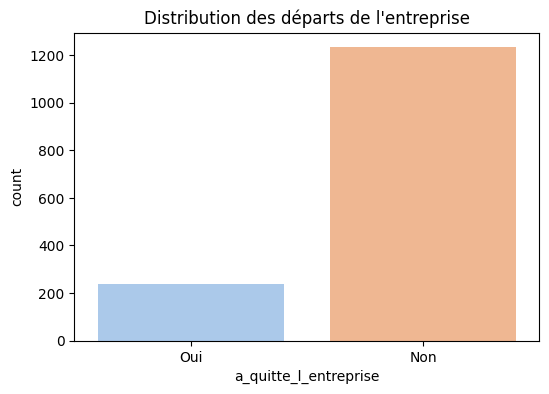

In [10]:
# Distribution de la variable cible
plt.figure(figsize=(6, 4))
sns.countplot(x='a_quitte_l_entreprise', data=df_final, palette='pastel')
plt.title("Distribution des départs de l'entreprise")
plt.savefig('dist_target.png')
print(df_final['a_quitte_l_entreprise'].value_counts())

Text(0.5, 0, 'Âge')

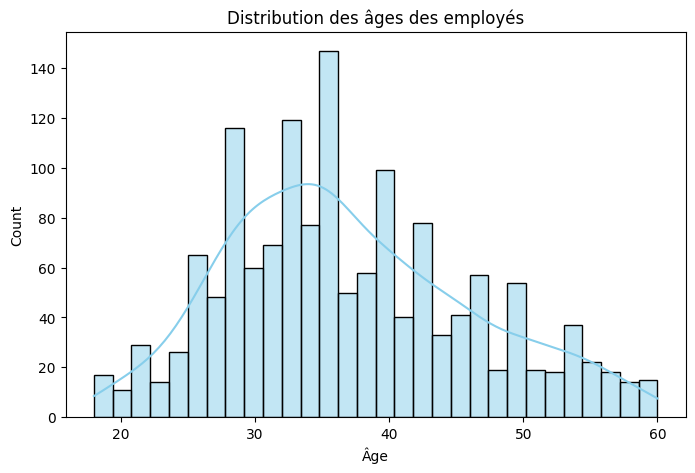

In [11]:
# Distribution de l'âge
plt.figure(figsize=(8, 5))
sns.histplot(df_final['age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution des âges des employés")
plt.xlabel("Âge")

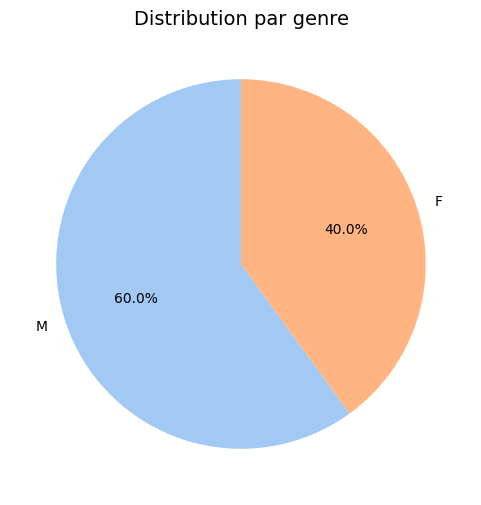

In [12]:
# Répartition par genre
color = sns.color_palette('pastel')

plt.figure(figsize=(6, 6))
plt.pie(df_final['genre'].value_counts(),
        labels=df_final['genre'].value_counts().index, 
        colors=color,
        autopct='%1.1f%%', 
        startangle=90)
plt.title("Distribution par genre", fontsize=14)
plt.show()

/var/folders/m5/mkh7m3r5249c4p2tn8rz71100000gn/T/ipykernel_89619/132230021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_final, x='niveau_education', palette='pastel')


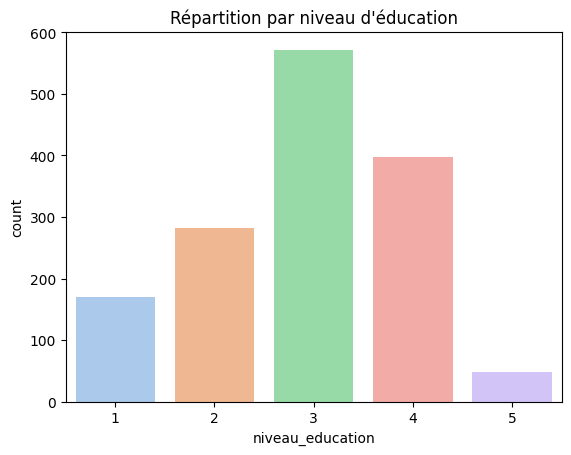

In [13]:
# Répartition par niveau d'éducation

plt.Figure(figsize=(8, 5))
sns.countplot(data = df_final, x='niveau_education', palette='pastel')
plt.title("Répartition par niveau d'éducation")
plt.show()

#### 1.5 Analayse Bi-Variée

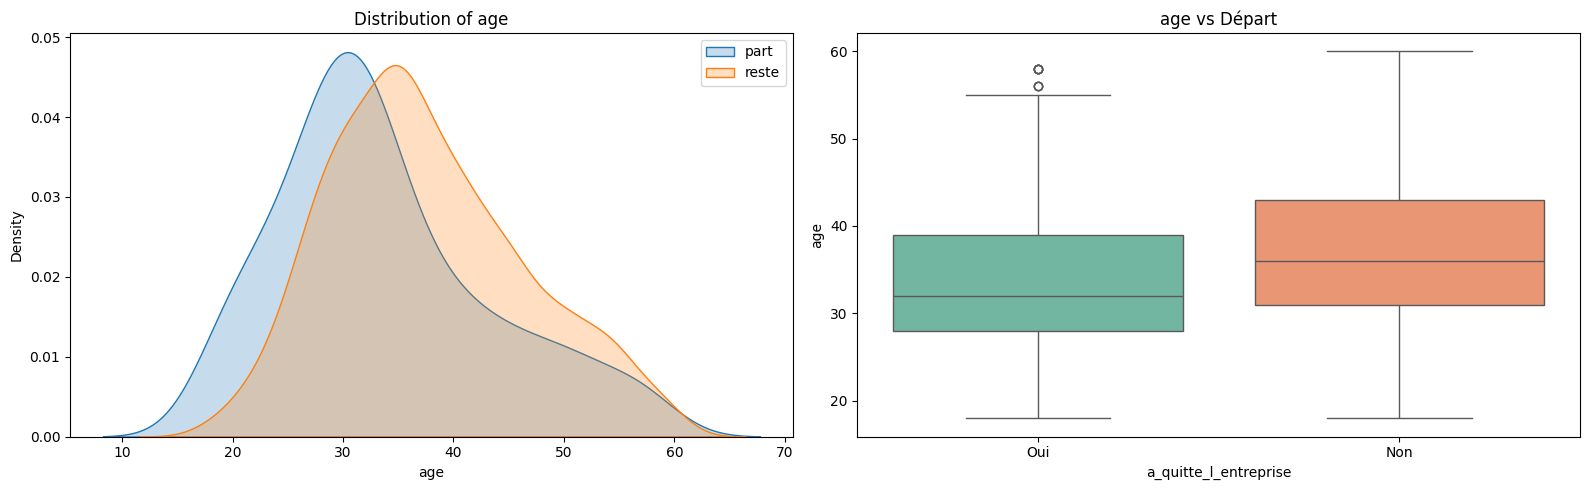

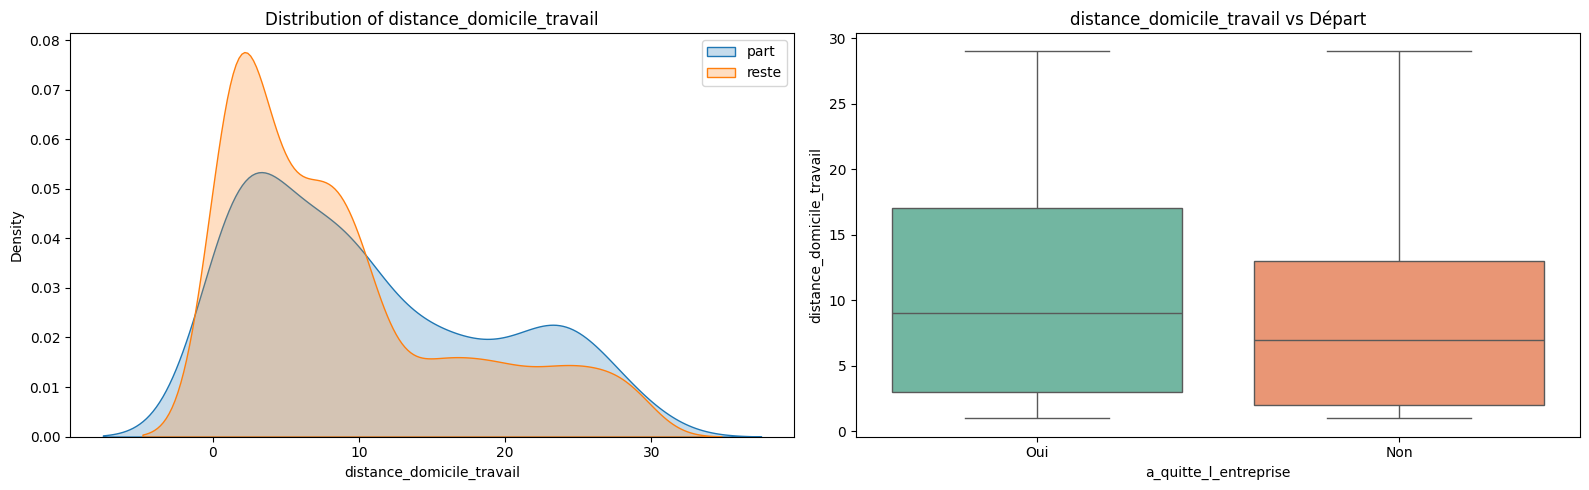

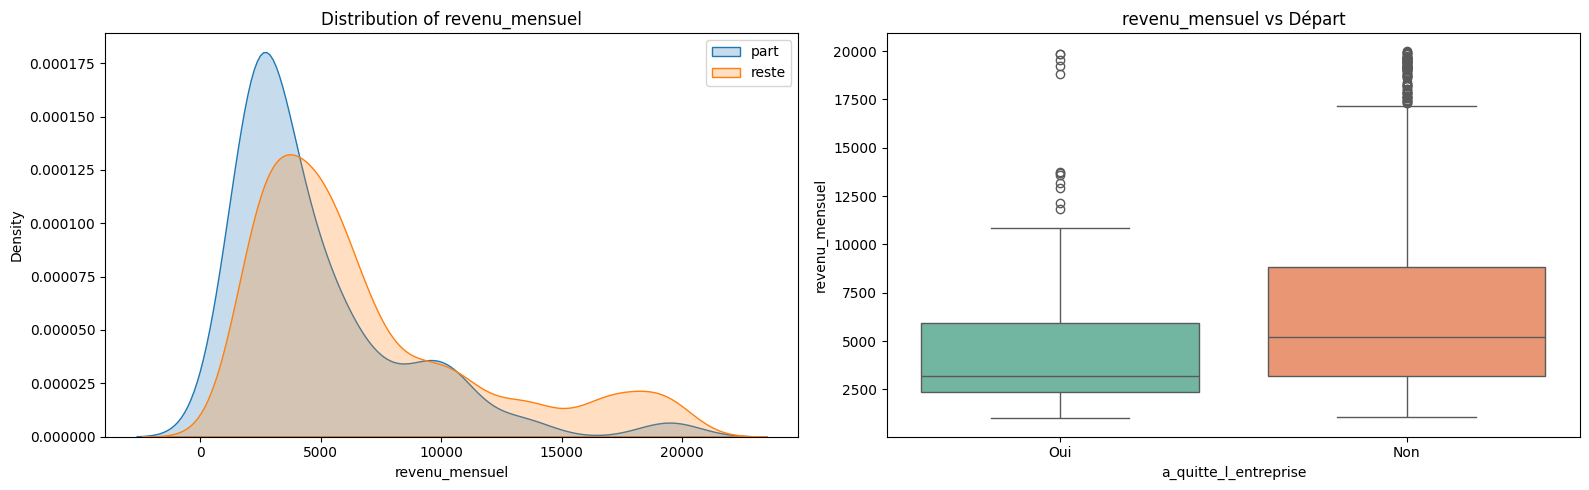

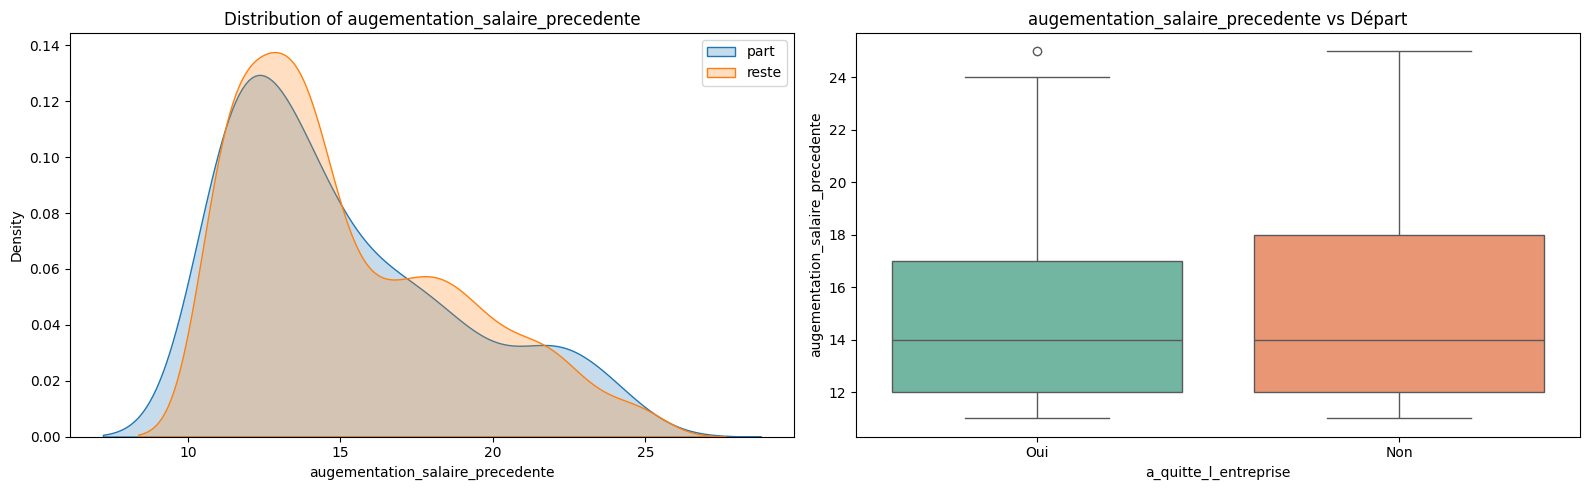

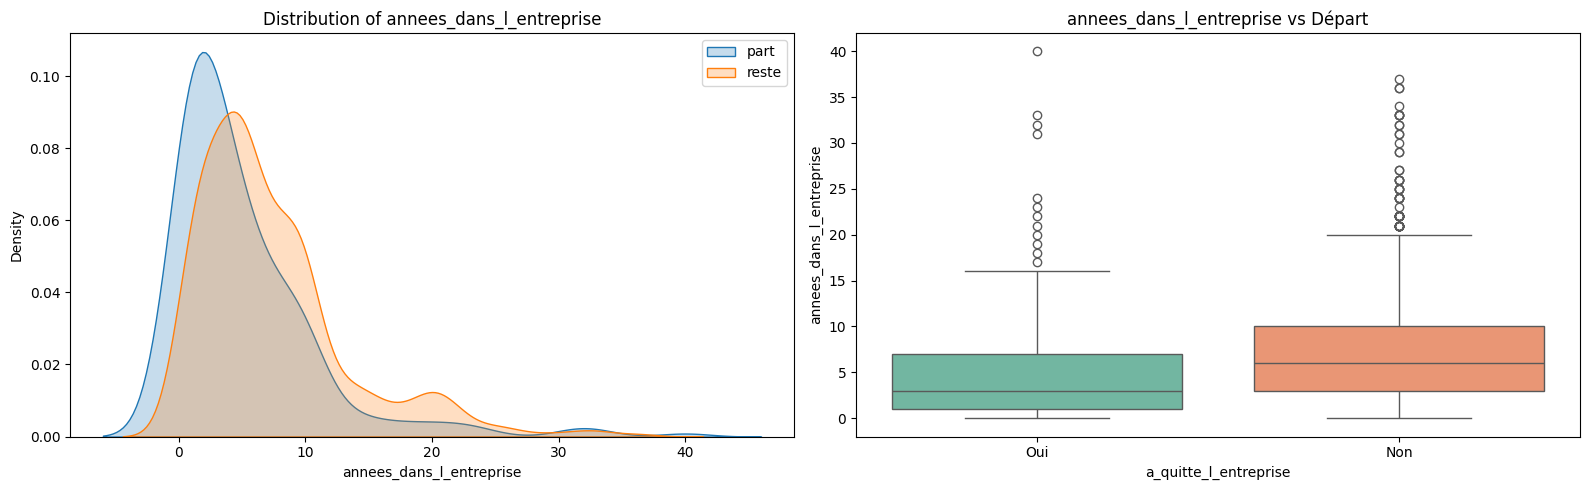

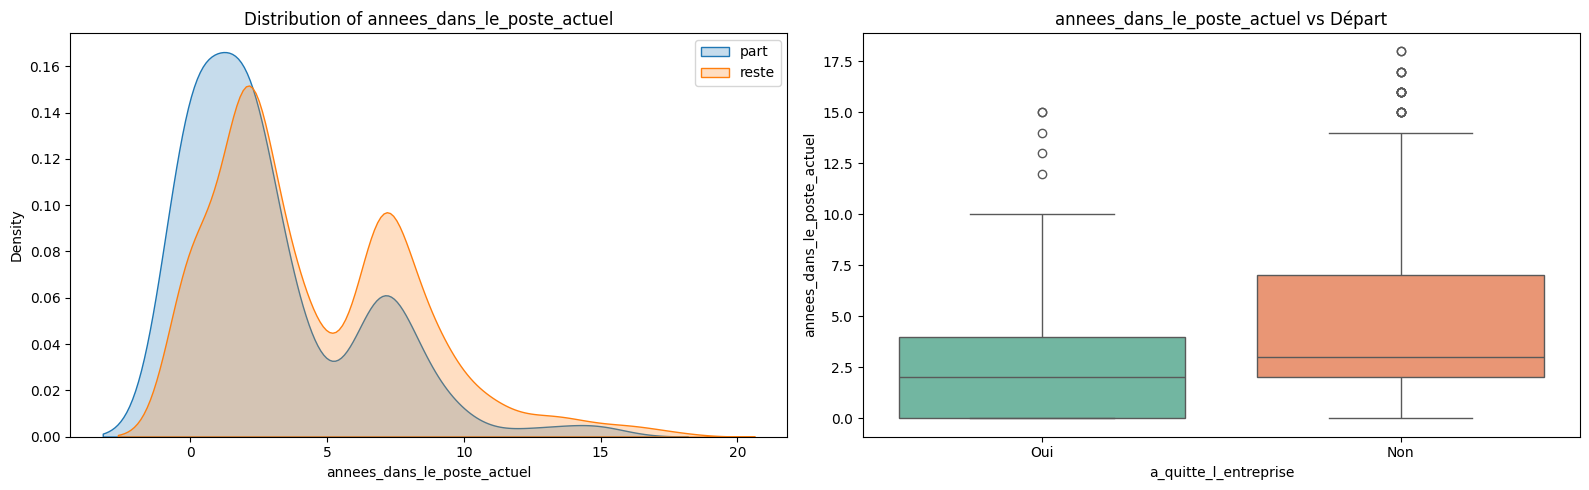

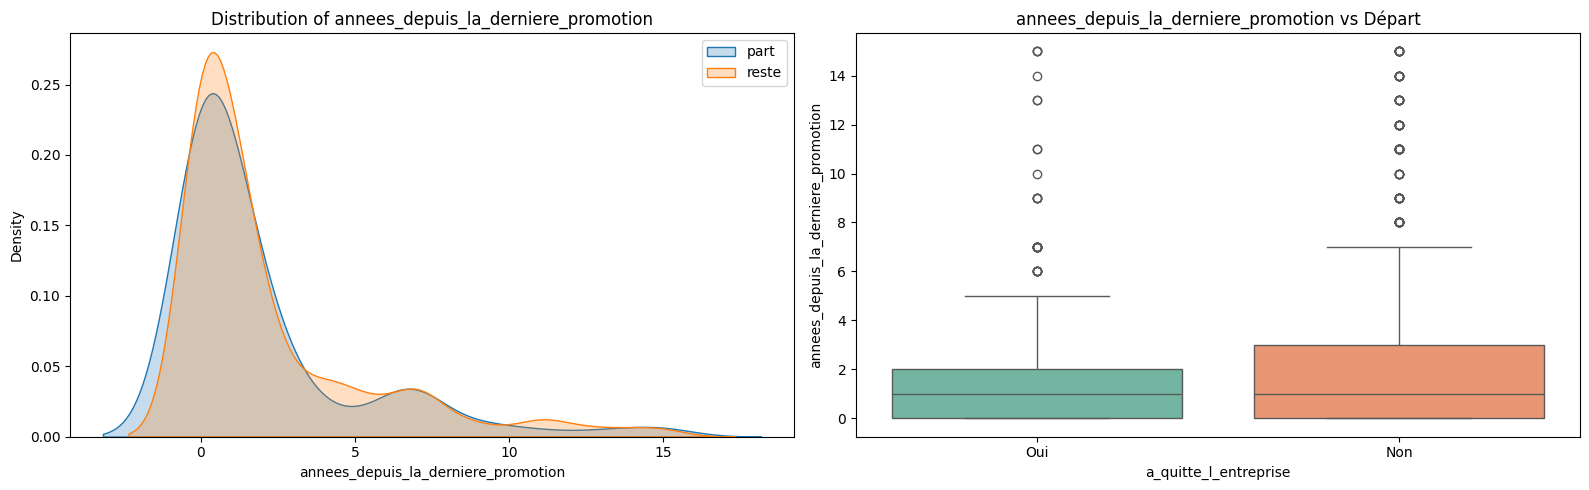

In [14]:
#Analyse bi-variée des colonnes numériques

def numerical_column_viz(col_name):
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))

    # Séparation des populations
    attrition = df_final[df_final["a_quitte_l_entreprise"] == "Oui"]
    no_attrition = df_final[df_final["a_quitte_l_entreprise"] == "Non"]

    # --- KDE ---
    sns.kdeplot(
        attrition[col_name],
        fill=True,
        label="part",
        ax=ax[0]
    )

    sns.kdeplot(
        no_attrition[col_name],
        fill=True,
        label="reste",
        ax=ax[0]
    )

    ax[0].set_title(f"Distribution of {col_name}")
    ax[0].legend()

    # --- Boxplot ---
    sns.boxplot(
        x="a_quitte_l_entreprise",
        y=col_name,
        data=df_final,
        ax=ax[1],
        hue="a_quitte_l_entreprise",
        legend=False,
        palette='Set2'
    )

    ax[1].set_title(f"{col_name} vs Départ")

    plt.tight_layout()


numerical_columns = [
    "age",
    "distance_domicile_travail",
    "revenu_mensuel",
    "augementation_salaire_precedente",
    "annees_dans_l_entreprise",
    "annees_dans_le_poste_actuel",
    "annees_depuis_la_derniere_promotion"
]

for col in numerical_columns:
    numerical_column_viz(col)
    plt.show()

Observations graphiques
- L’échantillon est composé de 1 470 salariés, dont 237 départs, soit 16 % de l’effectif.
On observe donc un déséquilibre de classes, qui devra être pris en compte lors de la modélisation.
- La distribution de l’âge est globalement proche d’une loi normale.
- La répartition par genre est d’environ 60 % d’hommes / 40 % de femmes, sans déséquilibre majeur.

Premiers facteurs explicatifs de l’attrition 

Les visualisations mettent en évidence plusieurs variables susceptibles d’expliquer l’attrition des salariés :
- Les salariés les plus jeunes présentent un taux de départ plus élevé.
- Les salaires les plus bas sont associés à une attrition accrue.
- Les employés ayant peu d’expérience dans leur poste quittent plus fréquemment l’entreprise.
- Une faible ancienneté dans l’entreprise est corrélée à un risque plus élevé de départ.
- Les salariés ayant une distance domicile–travail importante semblent également plus enclins à quitter l’entreprise.



#### 1.4 Préparation des données 

In [15]:
# features engineering

# Fidelité Ratio
df_final['Ratio_Fidelite'] = (
    df_final['annees_dans_l_entreprise'] /
    (df_final['annee_experience_totale'] + 1)
)

#Valeur reele de l'augmentation salariale
df_final['Valeur_Augmentation_reele'] = (
    df_final['revenu_mensuel'] *
    (df_final['augementation_salaire_precedente'] / 100)
)

#Ratio de stagnation
df_final['Ratio_Stagnation'] = ( 
    df_final['annees_depuis_la_derniere_promotion'] / (df_final['annees_dans_l_entreprise'] + 1) )

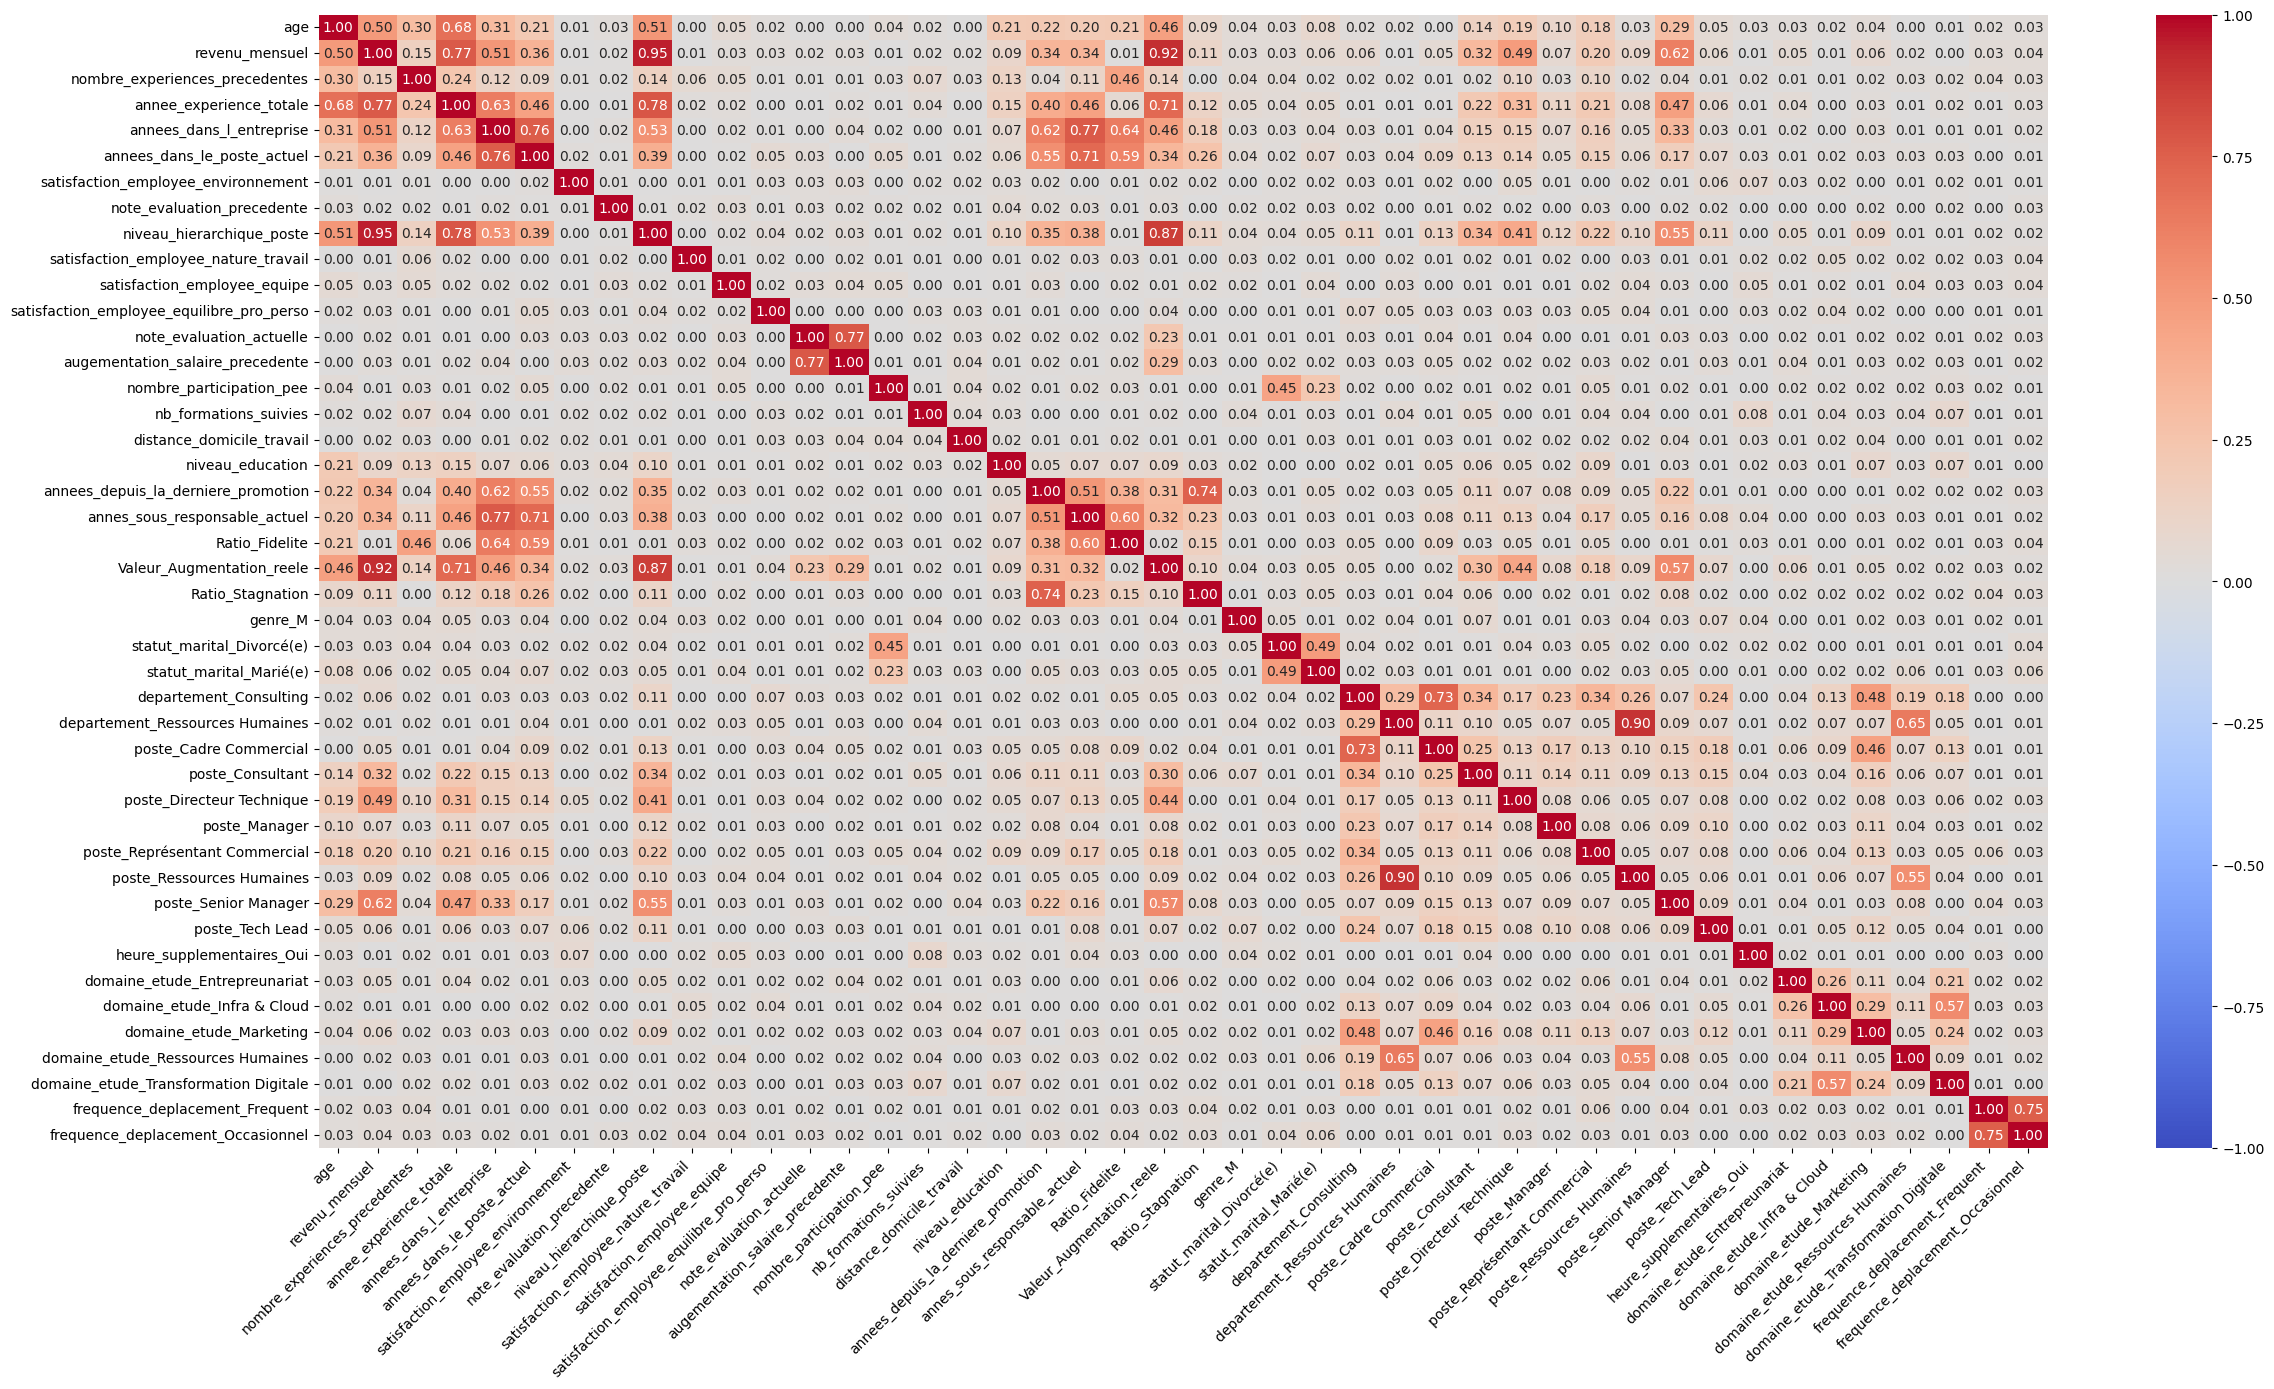

In [16]:
# Encodage et analyse de la corrélation

# Supression des variables inutiles
colonnes_inutiles = ['nombre_heures_travailless', 'nombre_employee_sous_responsabilite', 'id_employee']
df_final = df_final.drop(columns=colonnes_inutiles, errors='ignore')

# cible
df_final['cible'] = df_final['a_quitte_l_entreprise'].map({'Oui': 1, 'Non': 0})
df_final = df_final.drop(columns=['a_quitte_l_entreprise'])

# Encodage des variables catégorielles
df_prete = pd.get_dummies(df_final, drop_first=True)

# On definit X et Y
X = df_prete.drop(columns=['cible'])
Y = df_prete['cible']

# Analyse de la corrélation entre les variables

# Calcul de la matrice
corr_matrix = X.corr().abs()

# heatmap
plt.figure(figsize=(25, 14))  
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10}  
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Forte corrélations**

`revenu_mensuel` vs `niveau_hierarchique_poste`, `Valeur_Augmentation_reelle`, `annee_experience_totale` 
- On supprime `niveau_hierarchique_poste`, `Valeur_Augmentation_reelle`, `annee_experience_totale`

`departement_Ressources Humaines` vs `poste_Ressources Humaines`

- On supprime `poste_Ressources Humaines`

`note_evaluation_actuelle` vs `augementation_salaire_precedente`

- On supprime `augementation_salaire_precedente`

`annees_dans_l_entreprise` est très liée à pas mal de variable.

On gardera `annees_dans_l_entreprise` et on supprime les variantes (`annees_dans_le_poste_actuel`, `annes_sous_responsable_actuel`).

In [17]:
# Nettoyage final du jeu de données

variables_a_supprimer = [
    'niveau_hierarchique_poste',     
    'poste_Ressources Humaines',      
    'annee_experience_totale',       
    'augementation_salaire_precedente',
    'annees_dans_le_poste_actuel',    
    'annes_sous_responsable_actuel',
    'Valeur_Augmentation_reele'   
]

X = X.drop(columns=variables_a_supprimer, errors='ignore')

print("Final feature set shape:", X.shape)

Final feature set shape: (1470, 37)


### 2. Modélisation

In [18]:
# Séparation des données en ensembles d'entraînement et de test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

In [19]:
X_test.shape

(294, 37)


Modèle : Dummy
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



/Users/fatih/Library/Caches/pypoetry/virtualenvs/technova-analytics-jHn9g_d6-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/fatih/Library/Caches/pypoetry/virtualenvs/technova-analytics-jHn9g_d6-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/fatih/Library/Caches/pypoetry/virtualenvs/technova-analytics-jHn9g_d6-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being

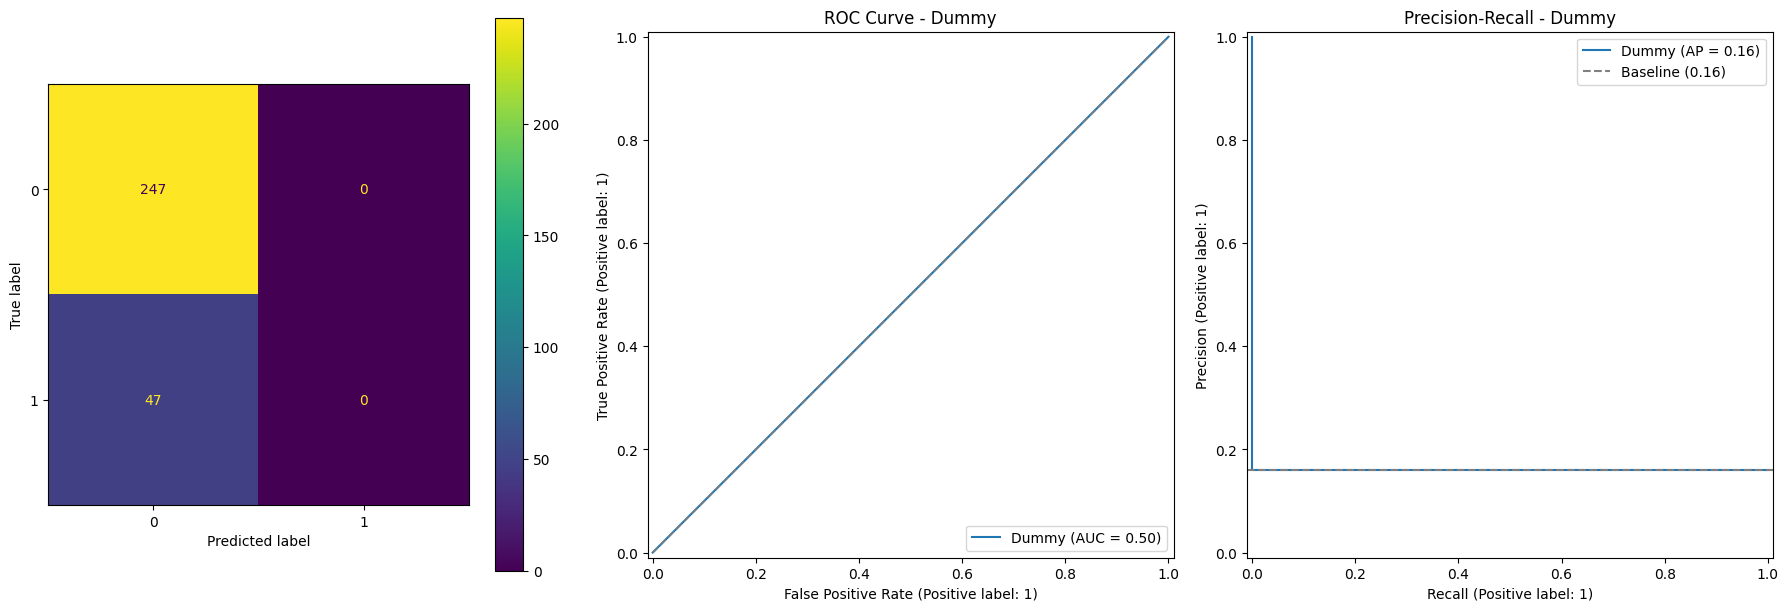


Modèle : Logistique
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       247
           1       0.38      0.66      0.48        47

    accuracy                           0.78       294
   macro avg       0.65      0.73      0.67       294
weighted avg       0.84      0.78      0.80       294



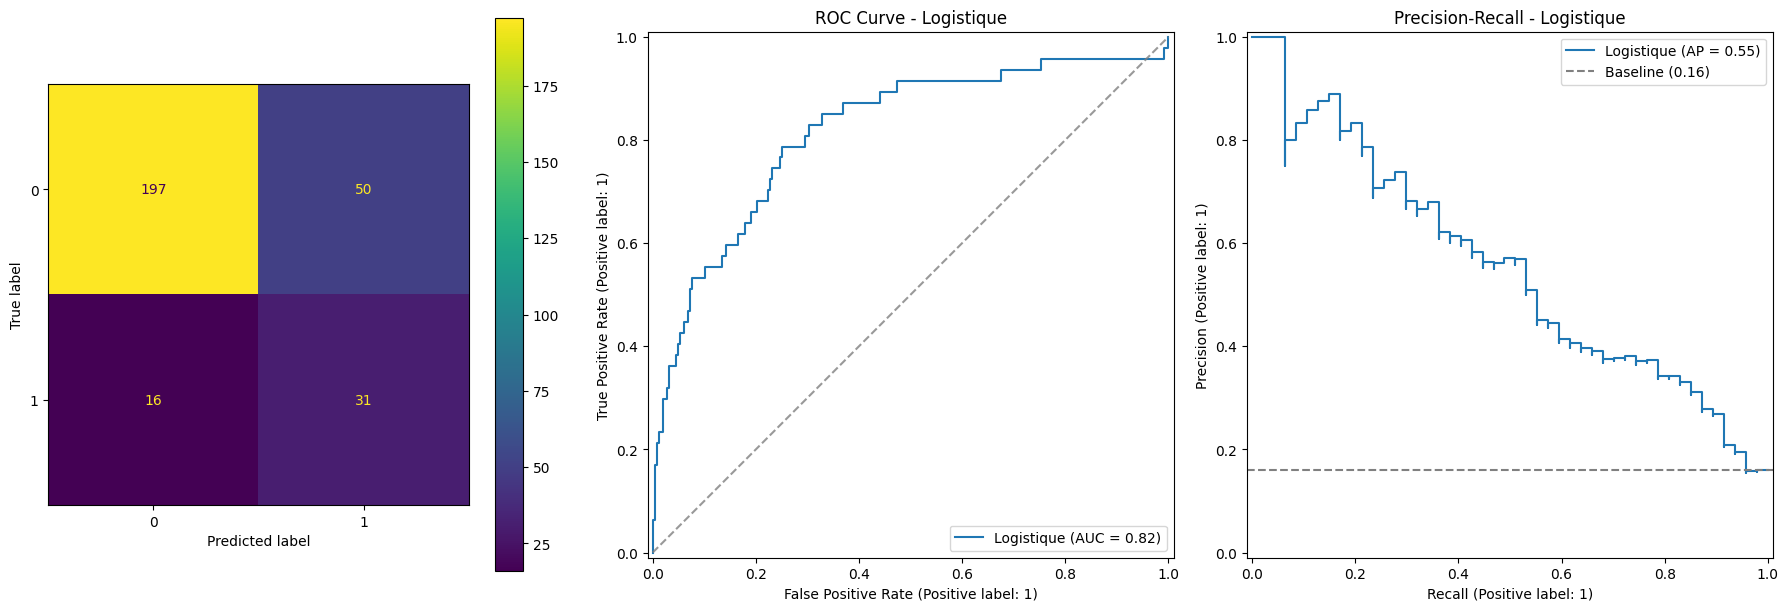


Modèle : Random Forest
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.56      0.11      0.18        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.55       294
weighted avg       0.81      0.84      0.80       294



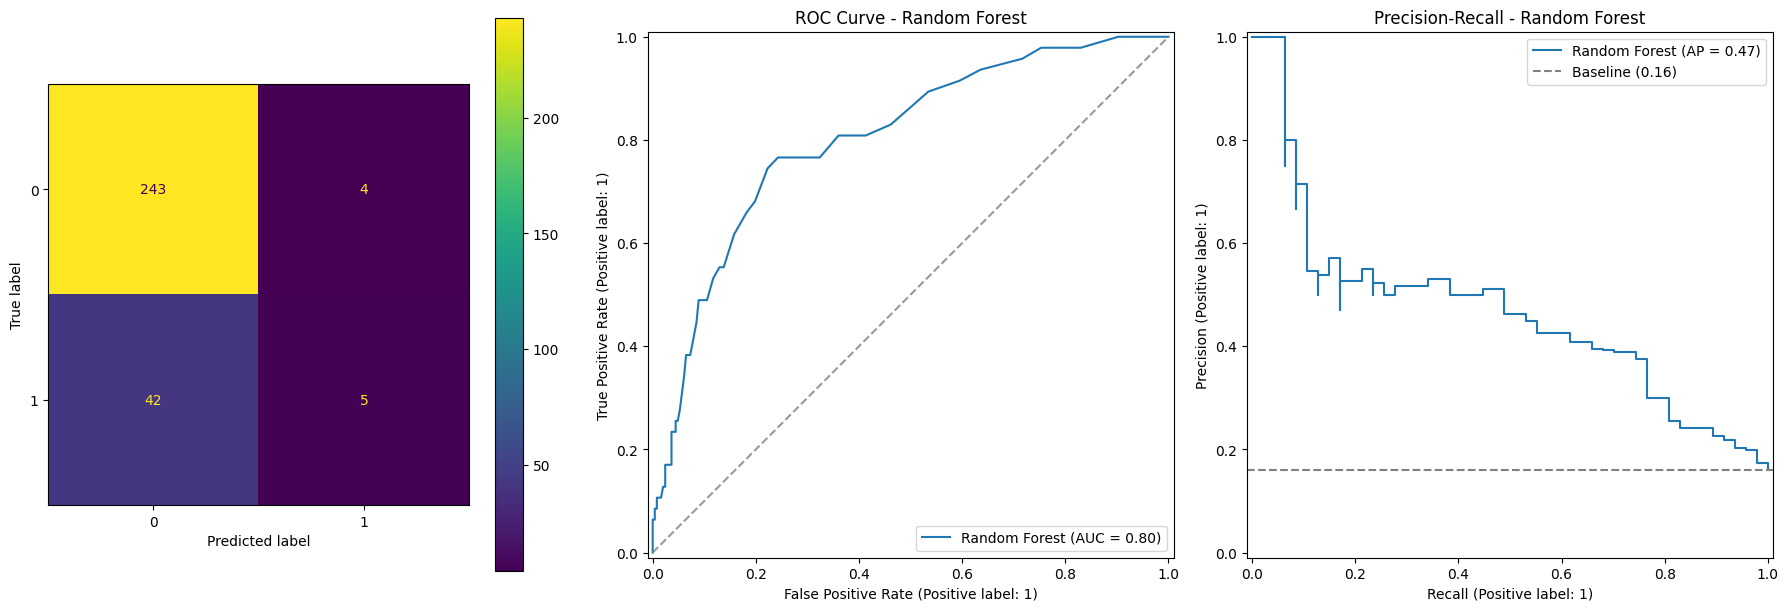


Modèle : SVM
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       247
           1       0.47      0.51      0.49        47

    accuracy                           0.83       294
   macro avg       0.69      0.70      0.69       294
weighted avg       0.84      0.83      0.83       294



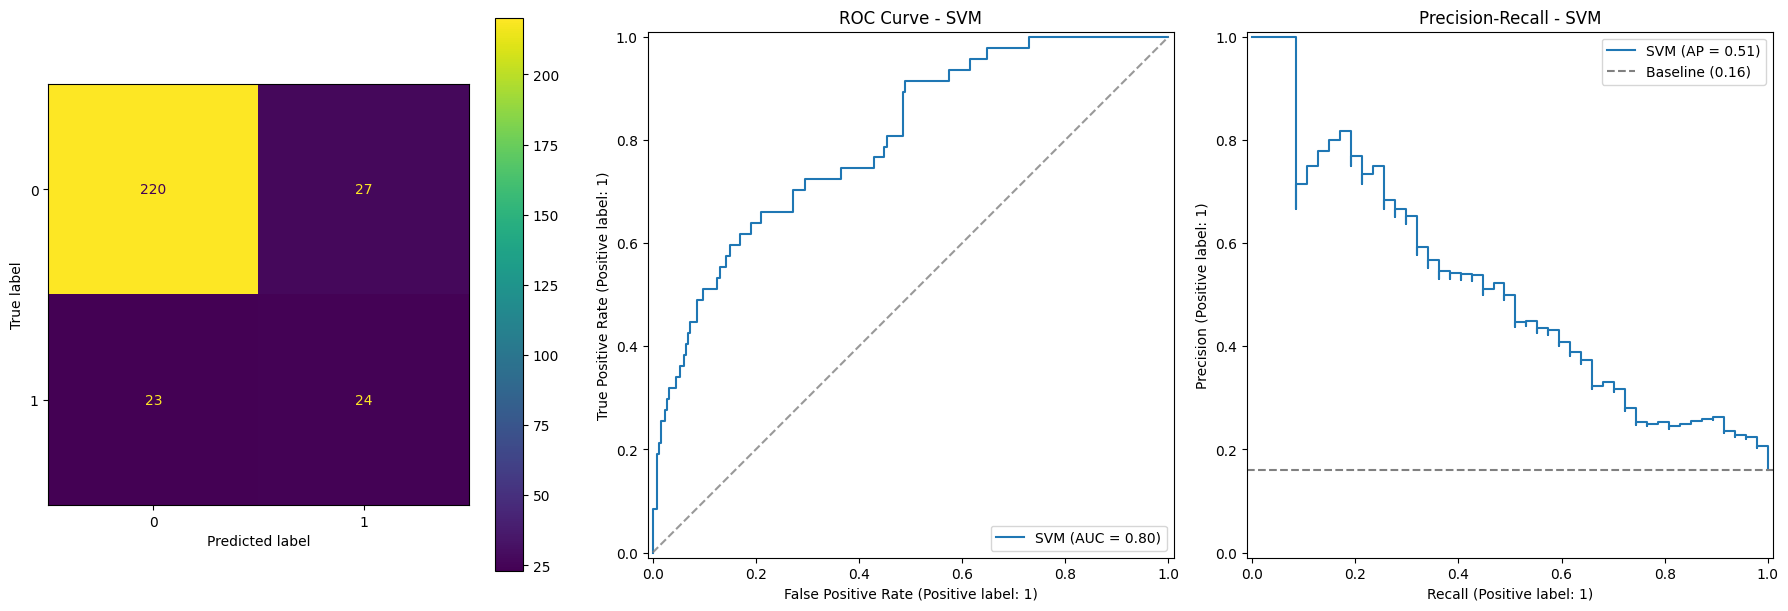


Modèle : XGBClassifier
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       247
           1       0.53      0.38      0.44        47

    accuracy                           0.85       294
   macro avg       0.71      0.66      0.68       294
weighted avg       0.83      0.85      0.84       294



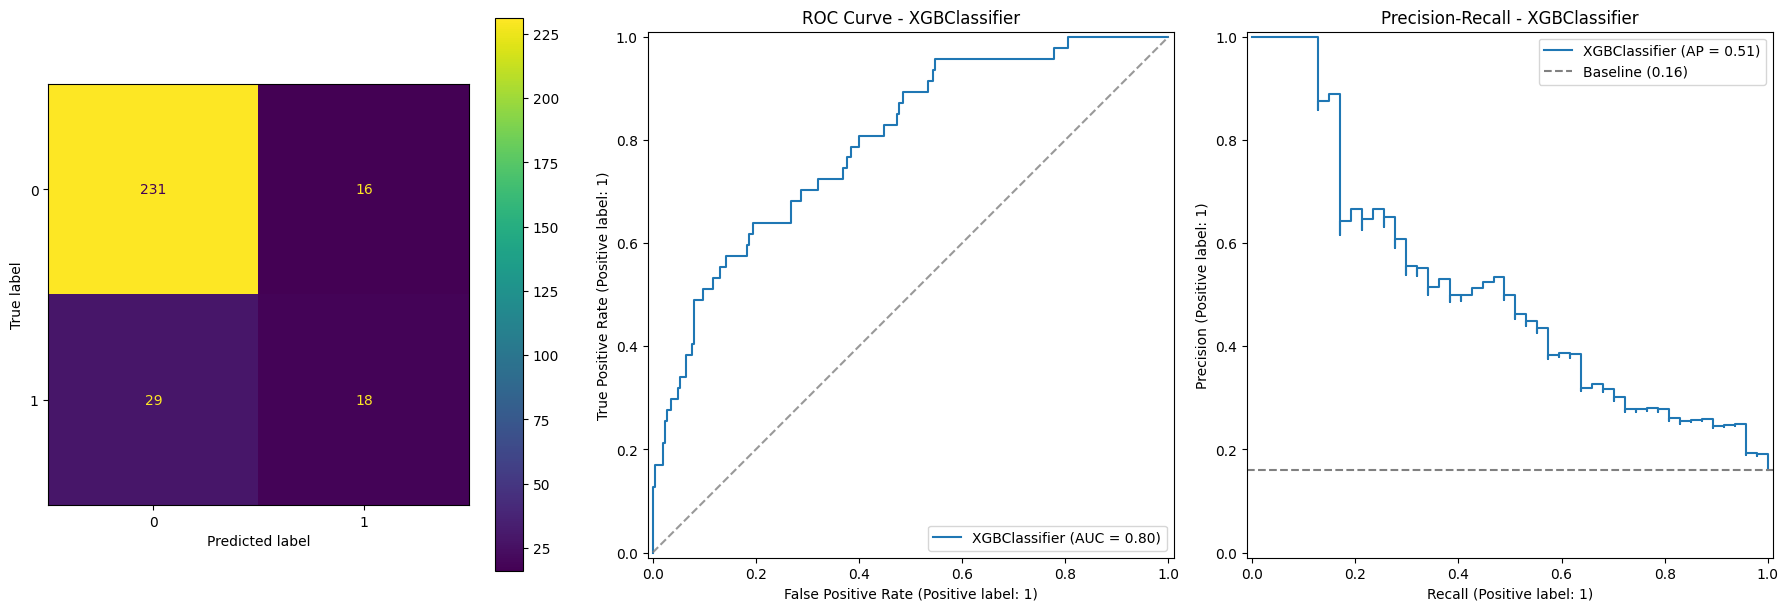

In [20]:
# importation des modèles et évaluation 

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from xgboost import XGBClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

modeles = {
    "Dummy": DummyClassifier(strategy="most_frequent"),

    "Logistique": make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=1000, class_weight="balanced")
    ),

    "Random Forest": RandomForestClassifier(
        random_state=42,
        class_weight="balanced"
    ),

    "SVM": make_pipeline(
        StandardScaler(),
        SVC(class_weight="balanced")
    ),

    "XGBClassifier": XGBClassifier(
        eval_metric="logloss",
        scale_pos_weight=5.20,
        random_state=42
    )
}

for nom, model in modeles.items():
    print(f"\nModèle : {nom}")
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    print(classification_report(Y_test, y_pred))

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    ConfusionMatrixDisplay.from_predictions(
        Y_test,
        y_pred,
        values_format="d",
        ax=ax1
    )
    
    RocCurveDisplay.from_estimator(
        model,
        X_test,
        Y_test,
        name=nom,
        ax=ax2
    )
    ax2.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.8)
    ax2.set_title(f"ROC Curve - {nom}")

    PrecisionRecallDisplay.from_estimator(
        model, 
        X_test, 
        Y_test, 
        name=nom, 
        ax=ax3
    )
    ax3.set_title(f"Precision-Recall - {nom}")
    
    # Ajout de la ligne de référence 
    baseline = Y_test.mean()
    ax3.axhline(y=baseline, color='gray', linestyle='--', label=f'Baseline ({baseline:.2f})')
    ax3.legend()

    plt.tight_layout()
    plt.show()

In [21]:
# Fonction d'évaluation des modèles

def evaluate_model(model, X_train, Y_train, X_test, Y_test,titre):
    print(f"\n===== {titre} =====")
    
    # TRAIN
    print("\nPERFORMANCE TRAIN :")
    y_train_pred = model.predict(X_train)
    print(classification_report(Y_train, y_train_pred))

    # TEST
    print("\nPERFORMANCE TEST :")
    y_test_pred = model.predict(X_test)
    print(classification_report(Y_test, y_test_pred))

    fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Matrice de confusion
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test,
        values_format="d",
        ax=ax1  
    )
    ax1.set_title(f"Confusion Matrix - {titre}")

    # ROC Curve
    RocCurveDisplay.from_estimator(
        model,
        X_test,
        Y_test,
        name=titre,
        ax=ax2
    )
    # Ligne de hasard 
    ax2.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.8)
    ax2.set_title(f"ROC Curve - {titre}")

    # Precision-Recall Curve
    PrecisionRecallDisplay.from_estimator(
        model, 
        X_test, 
        Y_test, 
        name=titre,    
        ax=ax3
    )
    ax3.set_title(f"Precision-Recall - {titre}")

    # Ajout de la ligne de référence 
    baseline = Y_test.mean()
    ax3.axhline(y=baseline, color='gray', linestyle='--', label=f'Baseline ({baseline:.2f})')
    ax3.legend()

    plt.tight_layout()
    plt.show()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................logisticregression__C=0.1; total time=   0.0s
[CV] END ..........................logisticregression__C=0.1; total time=   0.0s
[CV] END .........................logisticregression__C=0.01; total time=   0.0s
[CV] END ..........................logisticregression__C=0.1; total time=   0.0s
[CV] END .........................logisticregression__C=0.01; total time=   0.0s
[CV] END ..........................logisticregression__C=0.1; total time=   0.0s
[CV] END .........................logisticregression__C=0.01; total time=   0.0s
[CV] END .........................logisticregression__C=0.01; total time=   0.0s
[CV] END .........................logisticregression__C=0.01; total time=   0.0s
[CV] END ............................logisticregression__C=1; total time=   0.0s
[CV] END ............................logisticregression__C=1; total time=   0.0s
[CV] END ..........................logisticregres

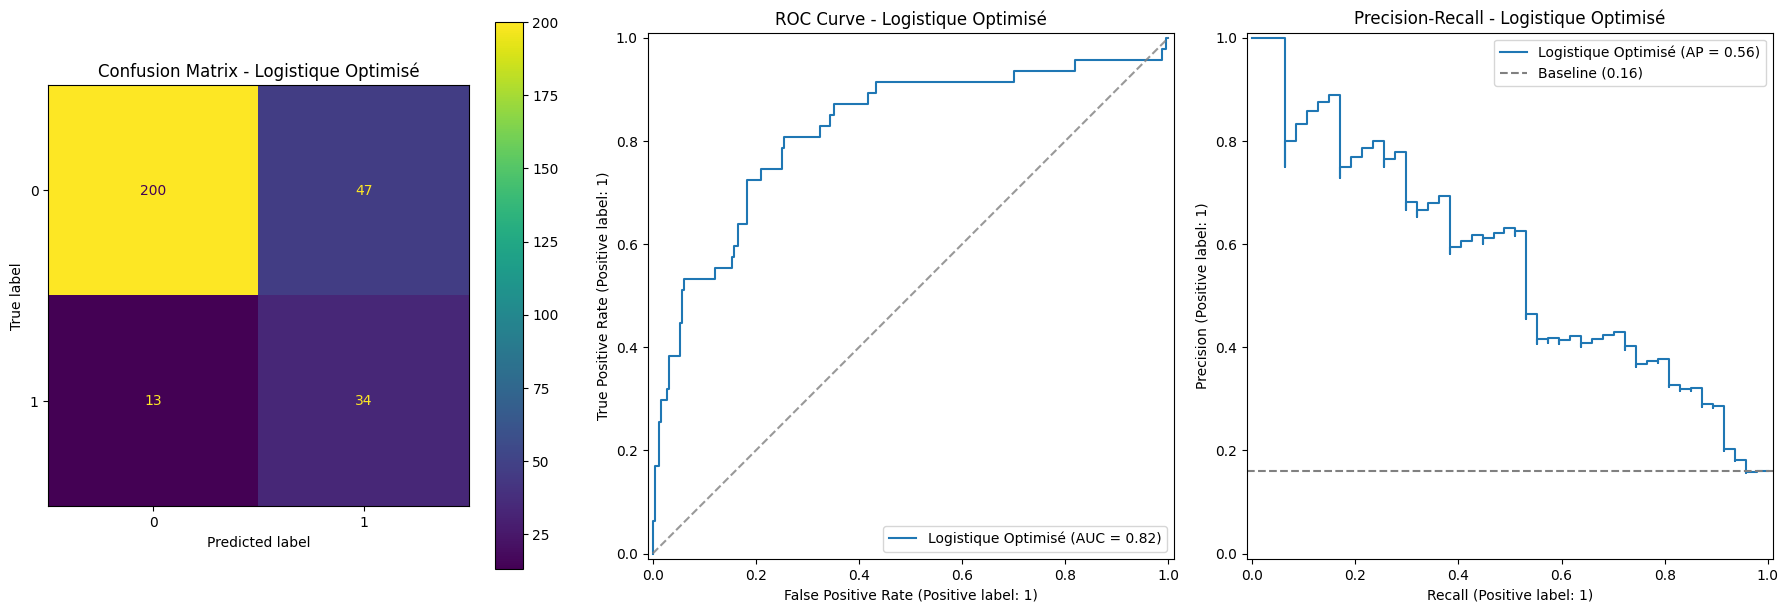

In [22]:
# Régression Logistique avec GridSearchCV
from sklearn.model_selection import GridSearchCV

pip_log = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        max_iter = 1000,
        class_weight="balanced"
    )
)

param_grid_log = {
    'logisticregression__C': [0.01, 0.1, 1, 5, 10]
}    

grid_log = GridSearchCV(
    pip_log,
    param_grid_log,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

grid_log.fit(X_train, Y_train)

best_log = grid_log.best_estimator_
print("leilleurs paramètres logistique :", grid_log.best_params_)

evaluate_model(
    best_log,
    X_train, Y_train,
    X_test, Y_test,
    "Logistique Optimisé"
)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................svc__C=0.1, svc__gamma=scale; total time=   0.0s
[CV] END .......................svc__C=0.1, svc__gamma=scale; total time=   0.0s
[CV] END .......................svc__C=0.1, svc__gamma=scale; total time=   0.0s
[CV] END .......................svc__C=0.1, svc__gamma=scale; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END .......................svc__C=0.1, svc__gamma=scale; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.0s
[CV] END .........................svc__C=0.1, svc__gamma=0.1; total time=   0.0s
[CV] END .........................svc__C=0.1, svc

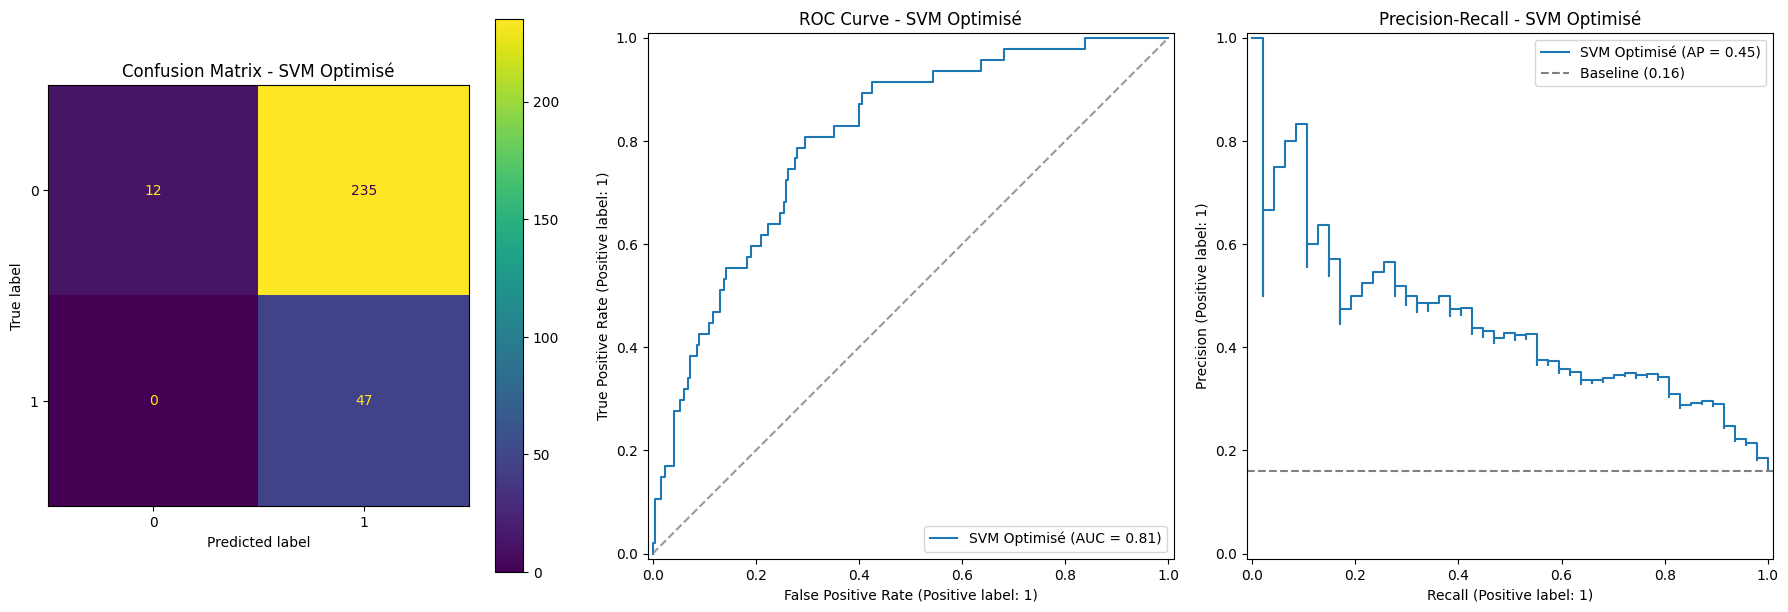

In [23]:
# Model SVM avec GridSearchCV

pip_svm = make_pipeline(
    StandardScaler(),
    SVC(class_weight="balanced")
)

param_grid_svm = {
    "svc__C": [0.1, 1, 10],
    "svc__gamma": ["scale", 0.01, 0.1]
}

grid_svm = GridSearchCV(
    pip_svm,
    param_grid_svm,
    scoring = "recall",
    cv = 5,
    n_jobs = -1,
    verbose = 2     
)

grid_svm.fit(X_train, Y_train)

best_svm = grid_svm.best_estimator_
print("Meilleurs paramètres SVM :", grid_svm.best_params_)

evaluate_model(
    best_svm,
    X_train, Y_train,
    X_test, Y_test,
    "SVM Optimisé" 
)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_c

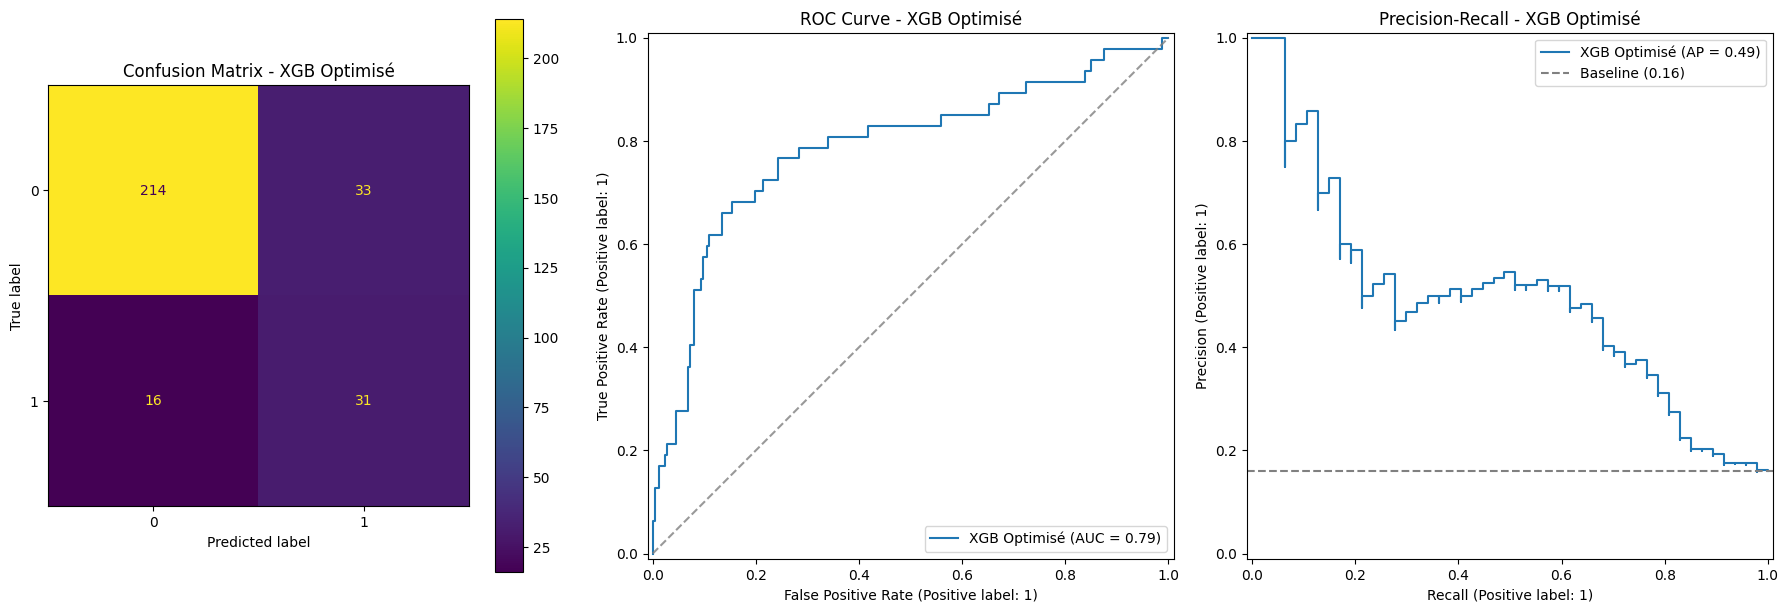

In [24]:
# XGBClassifier avec GridSearchCV

from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    scale_pos_weight = 5.20,
    random_state = 42
)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    "min_child_weight": [1, 5]
}

grid_xgb = GridSearchCV(
    xgb,
    param_grid_xgb,
    scoring="recall",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_xgb.fit(X_train, Y_train)

best_xgb = grid_xgb.best_estimator_
print("Meilleurs paramètres XGB :", grid_xgb.best_params_)  

evaluate_model(
    best_xgb,
    X_train, Y_train,
    X_test, Y_test,
    "XGB Optimisé"
)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, max_depth=5, min_samples_leaf=2, min_samples_

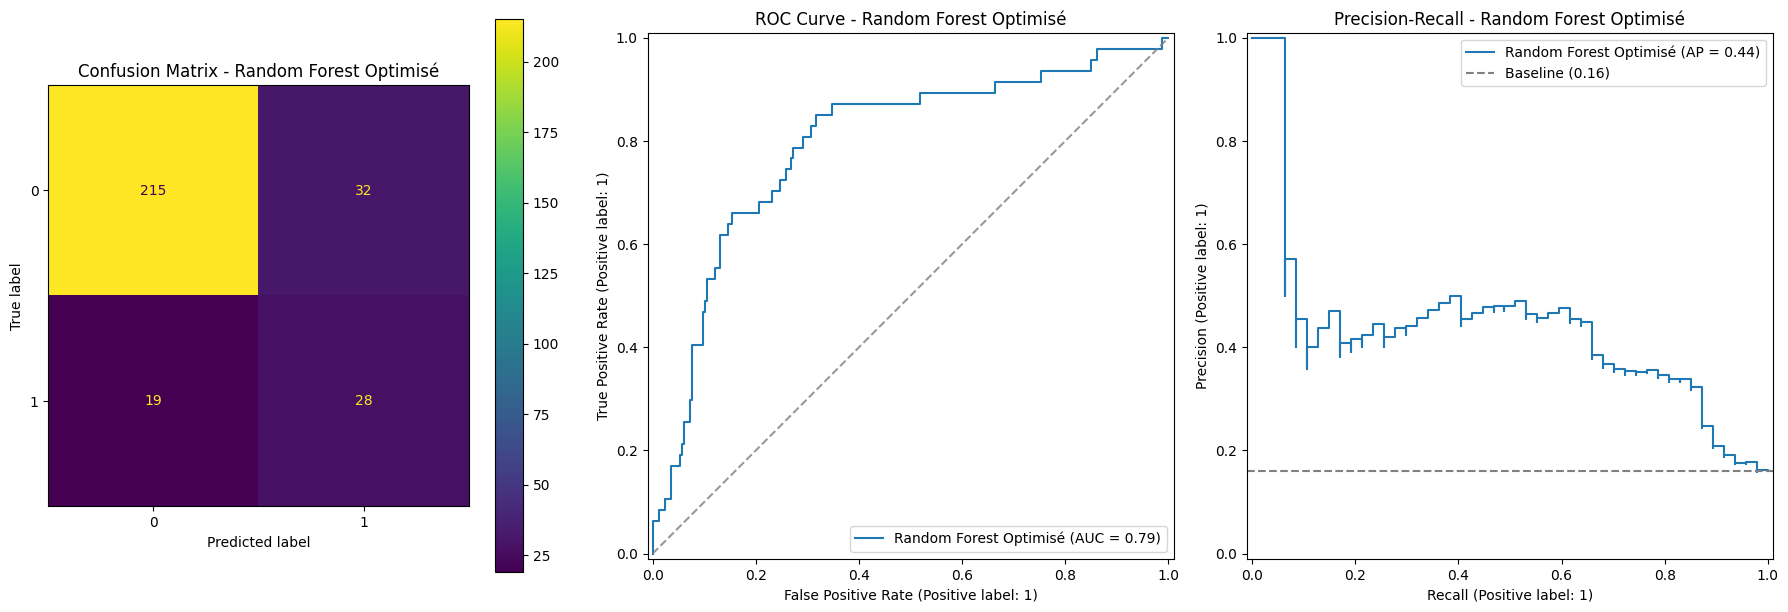

In [25]:
# randpom forest avec GridSearchCV

rf = RandomForestClassifier(
    random_state=42,
    class_weight="balanced"
)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [2, 5, 10],
    "class_weight": ["balanced"]
}

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    scoring="recall",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train, Y_train)

best_rf = grid_rf.best_estimator_
print("Meilleurs paramètres RF :", grid_rf.best_params_)

evaluate_model(
    best_rf,
    X_train, Y_train,
    X_test, Y_test,
    "Random Forest Optimisé"
)

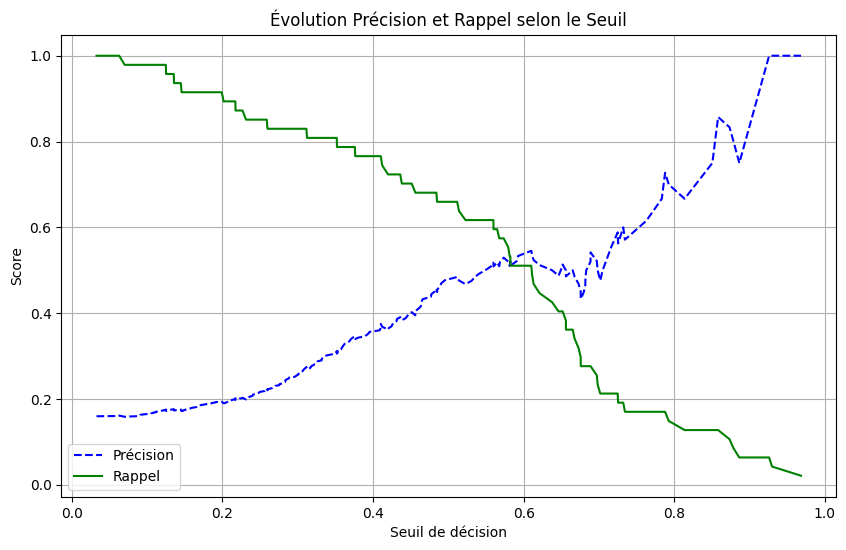

In [26]:
from sklearn.metrics import precision_recall_curve

# XGBClassifier - Précision et Rappel selon le seuil de décision
# Calcul des données
probas = best_xgb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, probas)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "b--", label="Précision")
plt.plot(thresholds, recall[:-1], "g-", label="Rappel")
plt.xlabel("Seuil de décision")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Évolution Précision et Rappel selon le Seuil")
plt.grid()
plt.show()

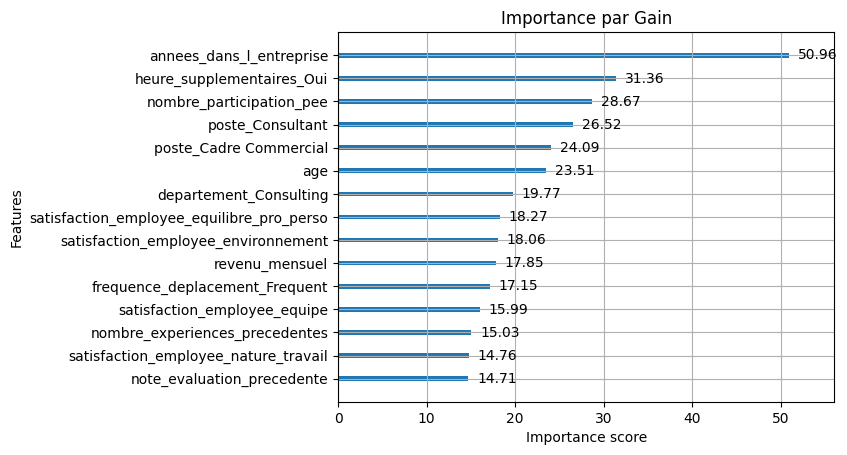

In [27]:
from xgboost import plot_importance

# Plot importance des features selon le gain
plot_importance(
    best_xgb,
    importance_type='gain',
    max_num_features=15,
    title='Importance par Gain',
    values_format='{v:.2f}'
    )
plt.show()

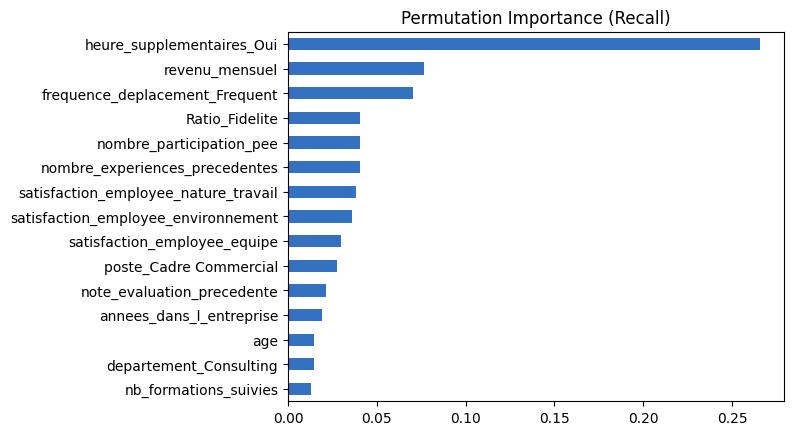

In [28]:
from sklearn.inspection import permutation_importance

# Permutation Importance
r = permutation_importance(
    best_xgb,
    X_test,
    Y_test,
    scoring='recall',
    n_repeats=10,
    random_state=42
    )

# Graphique 
pd.Series(r.importances_mean, index=X_test.columns).sort_values().tail(15).plot(kind='barh', color="#3471c0")

plt.title("Permutation Importance (Recall)")
plt.show()

/Users/fatih/Library/Caches/pypoetry/virtualenvs/technova-analytics-jHn9g_d6-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Les Causes


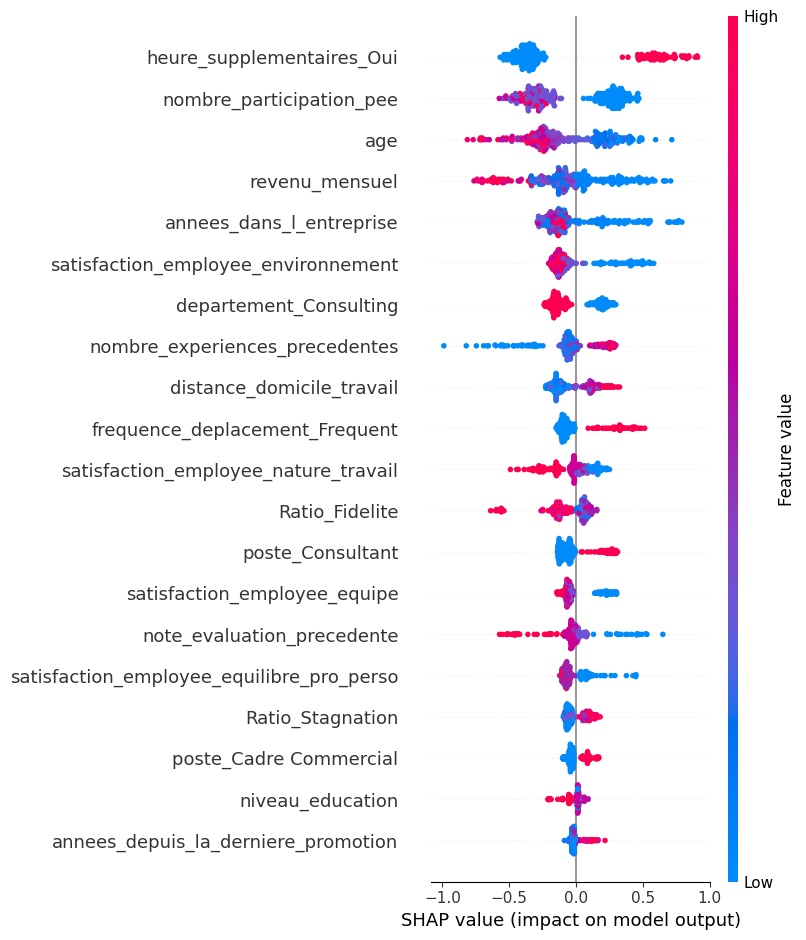

In [29]:
import shap
import matplotlib.pyplot as plt

#SHAP Values

# Initialisation JS
shap.initjs()

# Création de l'Explainer
explainer = shap.TreeExplainer(best_xgb)

# Calcul des Shap Values
shap_values = explainer.shap_values(X_test, check_additivity=False)

# GESTION DU FORMAT 
# On vérifie si shap_values est une liste (ancien format) ou un array 3D (nouveau format)
if isinstance(shap_values, list):
    vals = shap_values[1]
else:
    if len(shap_values.shape) == 3:
        vals = shap_values[:, :, 1]
    else:
        vals = shap_values

# 5. Affichage du graphique
print("Les Causes")
plt.figure(figsize=(10, 8))
shap.summary_plot(vals, X_test, plot_type="dot")

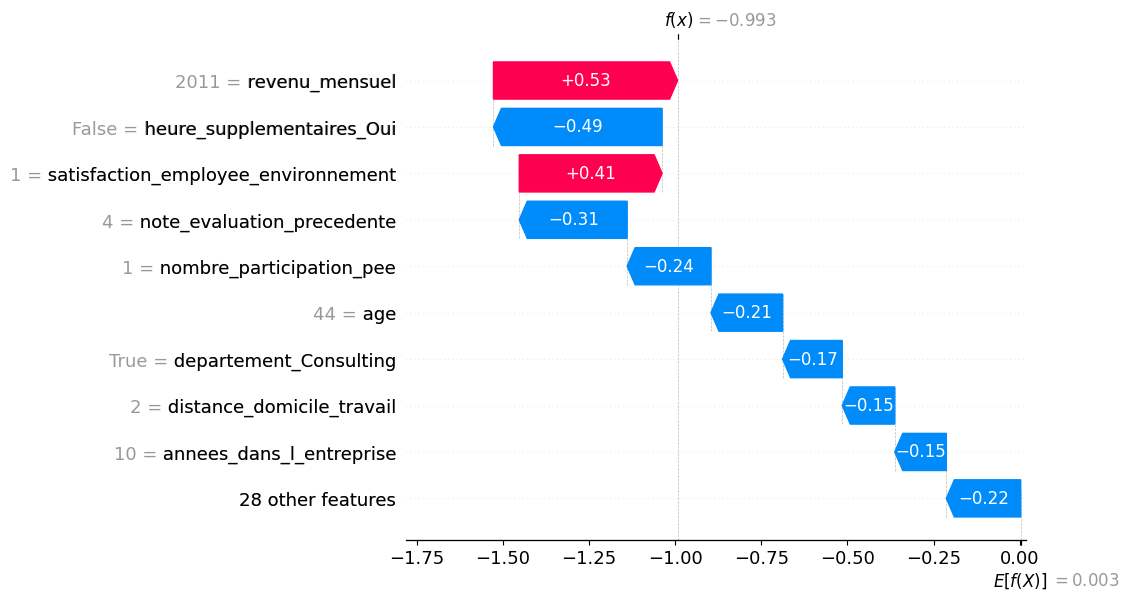

In [30]:
# analyse d'un individu spécifique qui reste dans l'entreprise
i = 1

shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[i],
        base_values=explainer.expected_value,
        data=X_test.iloc[i],
        feature_names=X_test.columns
    )
)

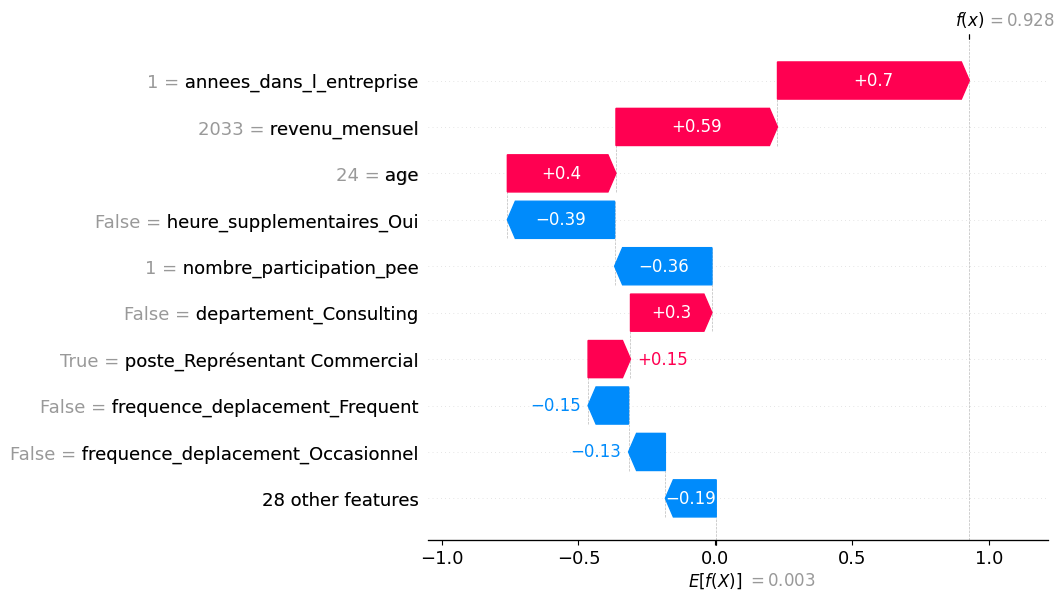

In [31]:
# analyse d'un individu qui a quitté l'entreprise
i = 0

shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[i],
        base_values=explainer.expected_value,
        data=X_test.iloc[i],
        feature_names=X_test.columns
    )
)

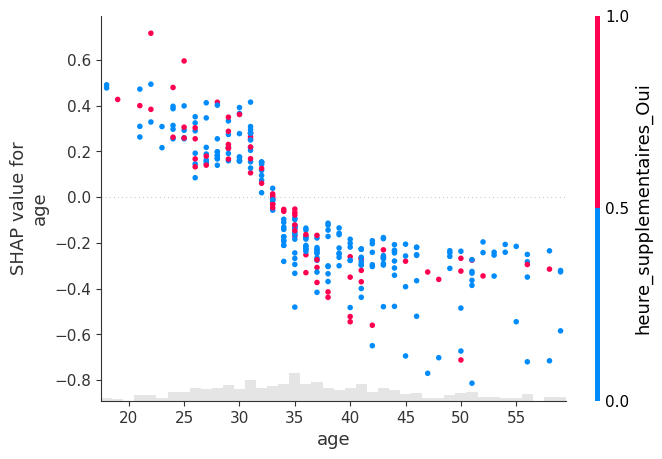

In [32]:
# Scatter plot entre revenu mensuel et années dans l'entreprise
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer(X_test)

shap.plots.scatter(
    shap_values[:, "age"], 
    color=shap_values[:, "heure_supplementaires_Oui"]
)

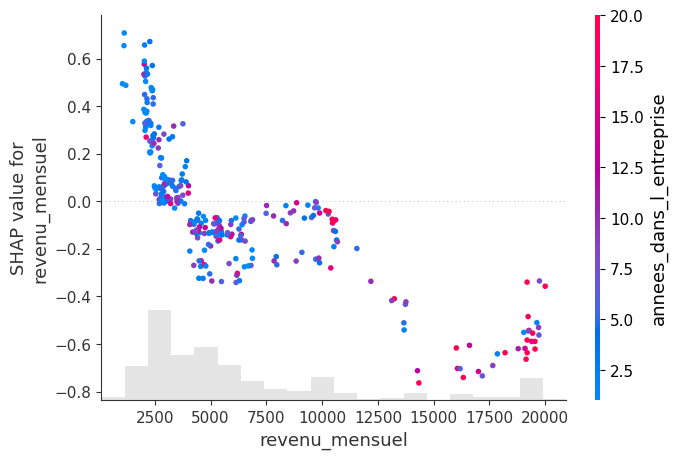

In [33]:
# Scatter plot entre revenu mensuel et années dans l'entreprise
shap.plots.scatter(
    shap_values[:, "revenu_mensuel"], 
    color=shap_values[:, "annees_dans_l_entreprise"]
)

### 3. Tests complémentaires

In [34]:
!pip install imbalanced-learn

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................model__C=0.01; total time=   0.1s
[CV] END ......................................model__C=0.01; total time=   0.1s
[CV] END ......................................model__C=0.01; total time=   0.0s
[CV] END ......................................model__C=0.01; total time=   0.0s
[CV] END .........................................model__C=1; total time=   0.0s
[CV] END .......................................model__C=0.1; total time=   0.0s
[CV] END .........................................model__C=1; total time=   0.0s
[CV] END .......................................model__C=0.1; total time=   0.0s
[CV] END .........................................model__C=1; total time=   0.0s
[CV] END ......................................model__C=0.01; total time=   0.0s
[CV] END .........................................model__C=1; total time=   0.0s
[CV] END ........................................

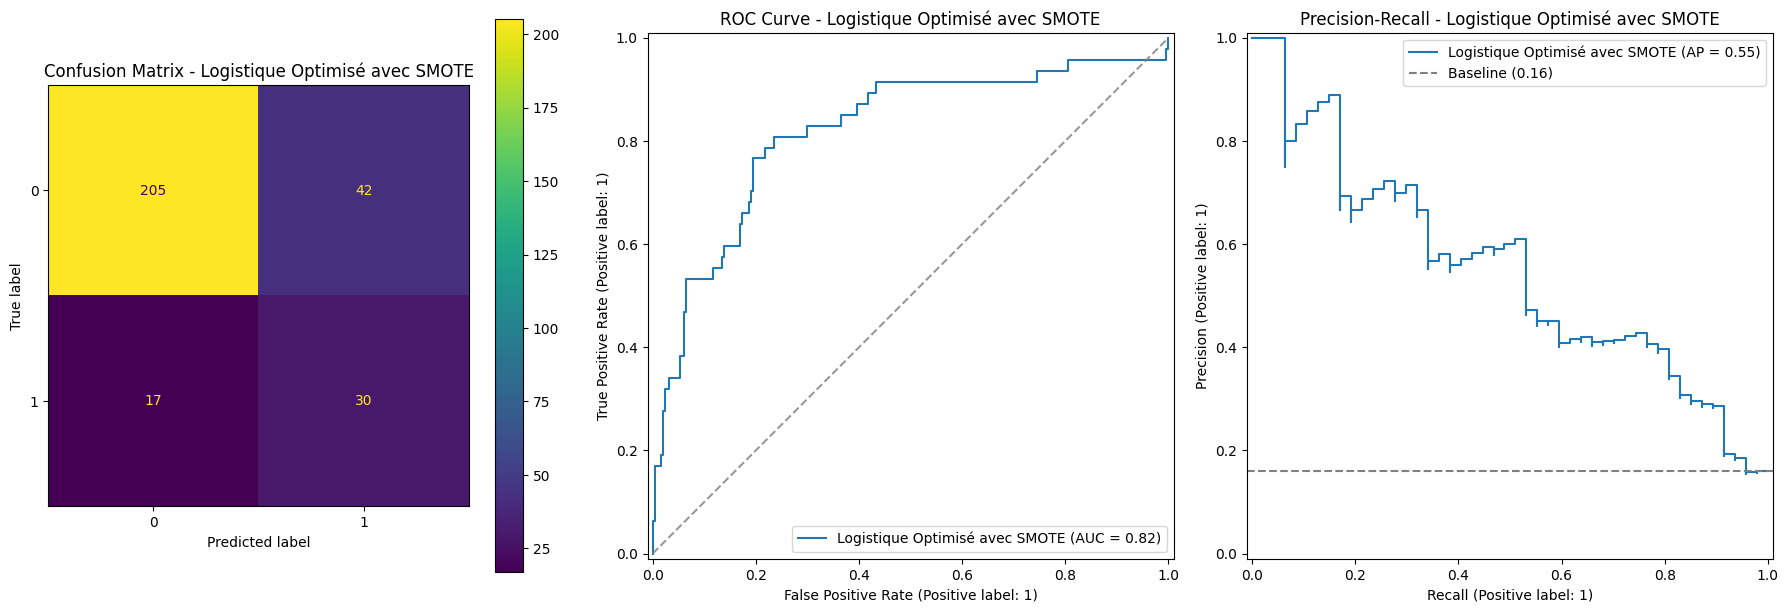

In [35]:
# Test avec SMOTE
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


pip_log_smote = Pipeline(steps=[
     ('scaler', StandardScaler()),
     ('smote', SMOTE(random_state=42)),
     ('model', LogisticRegression(max_iter=1000))
])

param_grid_log = {
    'model__C': [0.01, 0.1, 1, 5, 10]
}

grid_log_smote = GridSearchCV(
    pip_log_smote,
    param_grid_log,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_log_smote.fit(X_train, Y_train)
best_log_smote = grid_log_smote.best_estimator_
print("leilleurs paramètres logistique avec SMOTE :", grid_log_smote.best_params_)

evaluate_model(
    best_log_smote,
    X_train, Y_train,
    X_test, Y_test,
    "Logistique Optimisé avec SMOTE"
)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model__learning_rate=0.05, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__min_child_weight=1, model__n_estimators=200; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__min_child_weight=5, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.05, model__max_de

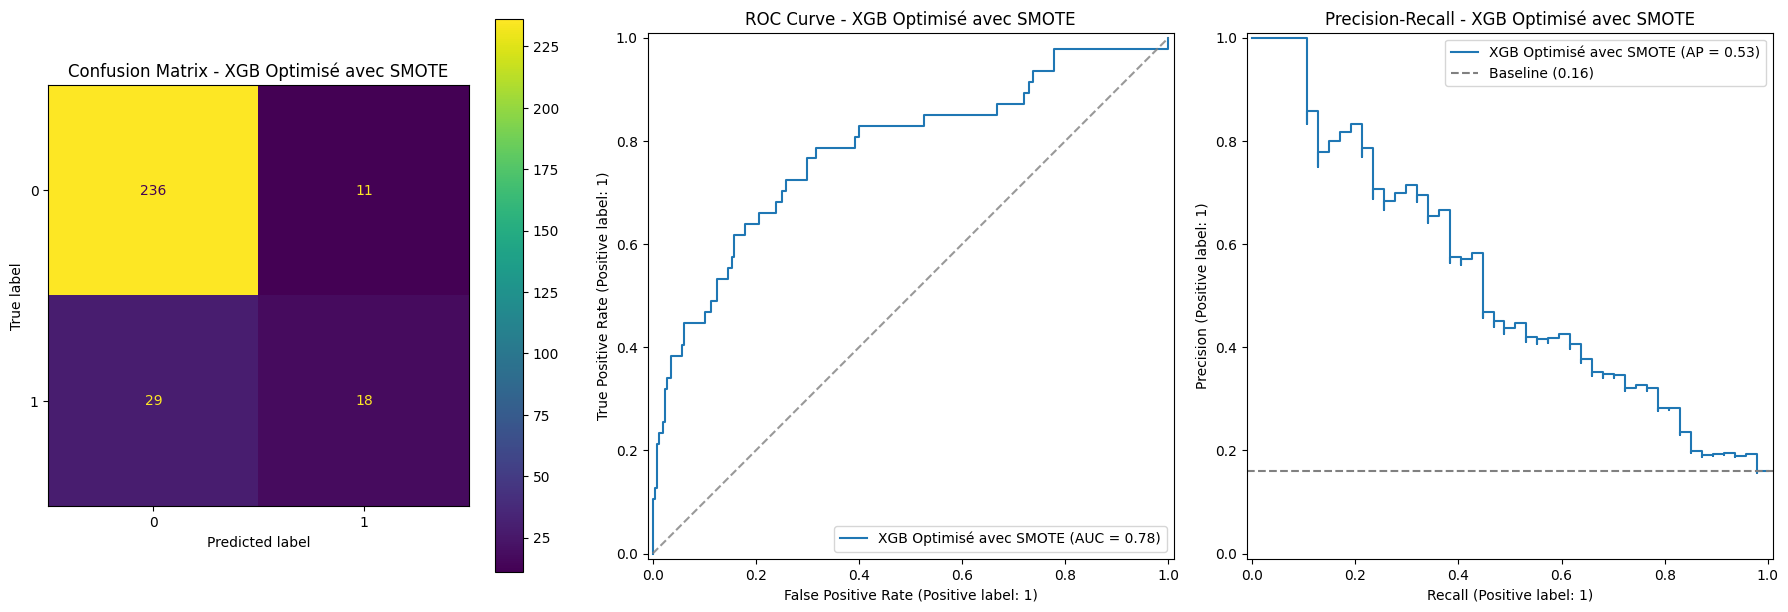

In [36]:
# XGBClassifier avec SMOTE

pip_xgb_smote = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        objective='binary:logistic',    
        eval_metric='logloss',
        scale_pos_weight=1,
        random_state=42
    ))
])

param_grid_xgb_smote = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1],
    "model__min_child_weight": [1, 5]
}

grid_xgb_smote = GridSearchCV(
    pip_xgb_smote,
    param_grid_xgb_smote,
    scoring="recall",
    cv=5,
    n_jobs=-1,
    verbose=2
)   

grid_xgb_smote.fit(X_train, Y_train)
best_xgb_smote = grid_xgb_smote.best_estimator_
print("Meilleurs paramètres XGB avec SMOTE :", grid_xgb_smote.best_params_)

evaluate_model(
    best_xgb_smote,
    X_train, Y_train,
    X_test, Y_test,
    "XGB Optimisé avec SMOTE"
)

In [37]:
import joblib

# on récupere le meilleur modèle XGBClassifier optimisé
print ("Sauvegarde du modèle XGBClassifier optimisé...")
joblib.dump(best_xgb, 'model_attrition.joblib')

# On sauvergarde la liste des features utilisées
cols = X_train.columns
joblib.dump(cols, 'model_feature.joblib')

print("✅ Succès! :")
print("- 'model_attrition.joblib'")
print("- 'model_features.joblib'")

Sauvegarde du modèle XGBClassifier optimisé...
✅ Succès! :
- 'model_attrition.joblib'
- 'model_features.joblib'
